## PREPROCESSING OF THE TWITTER DATA

In [1]:
import os
import pandas as pd

In [48]:
data = pd.read_csv('stock_data.csv')
data

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
5786,Industry body CII said #discoms are likely to ...,-1
5787,"#Gold prices slip below Rs 46,000 as #investor...",-1
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1


In [47]:
def preprocess_tweets(data):
        
    data['Text_Cleaned'] = data['Text'].str.lower()

    ## FIX HYPERLINKS
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'https?:\/\/.*[\r\n]*', ' ',regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'www.*[\r\n]*', ' ',regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('https', '', regex=False)


    ## FIX INDIVIDUAL SYMBOLS 
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(': ', ' ', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(', ', ' ', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('. ', ' ', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('[;\n~]', ' ', regex=True)

    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace("[]'’â€¦*™©|]", '', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('[[()!?"]', '', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('_', '', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('w/', ' with ', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('f/', ' for ', regex=False)


    ## FIX EMOJIS
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(':)', '', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(':-)', '', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(':(', '', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(':-(', '', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('0_o', '', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(';)', '', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('=^.^=', '', regex=False)


    ## FIX % SYMBOL
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('%', ' percent ', regex=False)


    ## FIX & SYMBOL
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' & ', ' and ', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('&amp', ' and ', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('&gt', ' greater than ', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('cup&handle', 'cup and handle', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('c&h', 'cup and handle', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('head&shoulders', 'head and shoulders', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('h&s', 'head and shoulders', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('point&figure', 'point and figure', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('p&f', 'point and figure', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('s&p', 'SP500', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('q&a', 'question and answer', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('&', ' and ', regex=False)


    ## FIX USER TAGS AND HASTAGS
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('@[a-z0-9]+', '', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('#[a-z0-9]+', '', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('@', '', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('#', '', regex=False)
        
        
    ## FIX EMBEDDED COMMAS AND PERIODS    
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([a-z]),([a-z])', r'\1 \2', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9]),([0-9])', r'\1\2', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])[+]+', r'\1 ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(',', '', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('u.s.', ' us ', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('\.{2,}', ' ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([a-z])\.([a-z])', r'\1 \2', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('pdating', 'updating', regex=False) 
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([a-z])\.', r'\1 ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'\.([a-z])', r' \1', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' . ', ' ', regex=False)
        

    ## FIX + SYMBOL
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'[+]([0-9])', r'positive \1', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('c+h', 'cup and handle', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('h+s', 'head and shoulders', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('cup+handle', 'cup and handle', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' + ', ' and ', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('+ ', ' ', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([a-z])[+]([a-z])', r'\1 and \2', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('+', '', regex=False)

        
    ## FIX - SYMBOL
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([a-z])[-]+([a-z])', r'\1 \2', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([a-z]) - ([a-z])', r'\1 to \2', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9]) -([0-9\.])', r'\1 to \2', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r' [-]([0-9])', r' negative \1', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])-([0-9\.])', r'\1 to \2', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9]) - ([0-9\.])', r'\1 to \2', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9a-z])-([0-9a-z])', r'\1 \2', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('[-]+[>]', ' ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' [-]+ ', ' ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('-', ' ', regex=False)


    ## FIX $ SYMBOL
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('[$][0-9\.]', ' dollars ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('$', '', regex=False)


    ## FIX = SYMBOL
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('=', ' equals ', regex=False)

        
    ## FIX / SYMBOL
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('b/c', ' because ', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('b/out', ' break out ', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('b/o', ' break out ', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('p/e', ' pe ratio ', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' [/]+ ', ' ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' 1/2 ', ' .5 ', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' 1/4 ', ' .25 ', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' 3/4 ', ' .75 ', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' 1/3 ', ' .3 ', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' 2/3 ', ' .6 ', regex=False)

    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('[/]{2,}', ' ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([a-z])/([a-z])', r'\1 and \2', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('[0-9]+/[0-9]+/[0-9]+', '', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9]{3,})/([0-9\.]{2,})', r'\1 to \2', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9]{2,})/([0-9\.]{3,})', r'\1 to \2', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('[a-z0-9]+/[a-z0-9]+', ' ', regex=True)

    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('/', '', regex=False)


    ## FIX < > SYMBOLS
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('[<]+ ', ' ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('<', ' less than ', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' [>]+', ' ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('>', ' greater than ', regex=False)


    ## FIX : SYMBOL
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('[0-9]+:[0-9]+am', ' ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('[0-9]+:[0-9]', ' ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(':', ' ', regex=False)


    ## FIX UNITS
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('user ', ' ', regex=False)

    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9]+)dma', r'\1 displaced moving average ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'dma([0-9]+)', r'\1 displaced moving average ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9]+)sma', r'\1 simple moving average ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'sma([0-9]+)', r'\1 simple moving average ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9]+)ema', r'\1 expontential moving average ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'ema([0-9]+)', r'\1 expontential moving average ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9]+)ma', r'\1 moving average ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'ma([0-9]+)', r'\1 moving average ', regex=True)

    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])mos', r'\1 months ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])minute', r'\1 minute ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])minutes', r'\1 minutes ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])min', r'\1 minute ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])mins', r'\1 minutes ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])day', r'\1 day ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])days', r'\1 days ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])wk', r'\1 week ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' wk ', ' week ', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' wknd ', ' weekend ', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])wks', r'\1 weeks ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])hours', r'\1 hours ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])hour', r'\1 hour ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])yr', r'\1 year ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])yrs', r'\1 years ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' yr', ' year ', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])am', r'\1 am ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])pm', r'\1 pm ', regex=True)

    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])est', r'\1 ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])ish', r'\1 ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9 ])pts', r'\1 points ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])x', r'\1 times ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])th', r'\1 ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])rd', r'\1 ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])st', r'\1 ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])nd', r'\1 ', regex=True)

    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('mrkt', 'market', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' vol ', ' volume ', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' ptrend', ' positive trend ', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' ppl', ' people ', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' pts', ' points ', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' pt', ' point ', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' l(ol){1,}', ' laugh ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('imho', ' in my opinion ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('prev ', 'previous ', regex=True)


    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' 1q', ' first quarter ', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' 2q', ' second quarter ', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' 3q', ' third quarter ', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' 4q', ' fourth quarter ', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' q1', ' first quarter ', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' q2', ' second quarter ', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' q3', ' third quarter ', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' q4', ' fourth quarter ', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' 10q ', ' form 10 ', regex=False)

    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])million', r'\1 million ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])mil', r'\1 million ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' mil ', ' million ', regex=False)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])billion', r'\1 billion ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])cents', r'\1 cents ', regex=True)

    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])3d', r'\1 3 dimensional ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])gb', r'\1 3 gigabytes ', regex=True)



    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])c', r'\1 calls ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])y', r'\1 year ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])p', r'\1 puts ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])d', r'\1 days ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])h', r'\1 hour ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])s', r'\1 ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])k1', r'\1 thousand ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])k', r'\1 thousand ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])m', r'\1 million ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])b', r'\1 billion ', regex=True)

        
    data['Text_Cleaned'] = data['Text_Cleaned'].replace(r'([0-9])([a-z])', r'\1 \2', regex=True)

    ## FIX EXTRA SPACES AND ENDING PUNCTUATION
    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(' +', ' ', regex=True)
    data['Text_Cleaned'] = data['Text_Cleaned'].str.strip(' .!?,)(:-')

    data['Text_Cleaned'] = data['Text_Cleaned'].str.replace("[^a-z\s\(\-:\)\\\/\];='#]", '', regex=True)


    # EXTRACT NEGATION FROM CONTRACTIONS
    words = ['do', 'does', 'have', 'has', 'is', 'are', 'wo', 'would', 'should', 
             'need', 'sha', 'had', 'could', 'can', 'was', 'were', 'did']
    for word in words:
        if word == 'wo':
            data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(f"{word}nt", 'will not', regex=False)
        elif word == 'sha':
            data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(f"{word}nt", 'shall not', regex=False)
        else:
            data['Text_Cleaned'] = data['Text_Cleaned'].str.replace(f"{word}nt", f'{word} not', regex=False)

    return data

In [50]:
data = preprocess_tweets(data)

In [51]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

# Predict sentiment with Vader classifier
data['Vader_Scores'] = data['Text_Cleaned'].apply(lambda score: sid.polarity_scores(score)['compound'])
data['Vader_Prediction'] = data['Vader_Scores'].apply(lambda score: 1 if score >= 0 else -1)

# Print Vader sentiment accuracy
print('Vader Accuracy:', round((len(data[data['Sentiment'] == data['Vader_Prediction']]) / len(data)) * 100, 2), '%', '\n')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Vader Accuracy: 66.53 % 



In [52]:
nltk.download('stopwords')
from nltk.corpus import stopwords

# stopwords removal
stop_words = set([s.replace("'", '') for s in stopwords.words('english') if s not in ['not', 'up', 'down', 'above', 'below', 'under', 'over']])

data['Text_Processed'] = data['Text_Cleaned'].apply(lambda s: " ".join([word for word in s.split() if word not in stop_words]))

# Predict sentiment with Vader classifier
data['Vader_Scores_Processed'] = data['Text_Processed'].apply(lambda score: sid.polarity_scores(score)['compound'])
data['Vader_Prediction_Processed'] = data['Vader_Scores_Processed'].apply(lambda score: 1 if score >= 0 else -1)

# Print Vader sentiment accuracy
print('Vader Accuracy Processed:', round((len(data[data['Sentiment'] == data['Vader_Prediction_Processed']]) / len(data)) * 100, 2), '%', '\n')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Vader Accuracy Processed: 66.34 % 



Interestingly, after stopword removal Vader performs ever so slightly worse.

## USING BERT TO TRAIN MODEL

In [53]:
!pip install transformers
from transformers import BertTokenizer, BertModel
from transformers import get_linear_schedule_with_warmup
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from torch.optim import AdamW
import numpy as np
from math import ceil

train_percentage = 0.8
np.random.seed(1)
idx = np.random.permutation(len(data))


# split data into train and test datasets
X_train = data['Text_Processed'].values[idx[:ceil(train_percentage * len(data))]]
y_train = data['Sentiment'].values[idx[:ceil(train_percentage * len(data))]]
y_train[y_train == -1] = 0
X_test = data['Text_Processed'].values[idx[ceil(train_percentage * len(data)):]]
y_test = data['Sentiment'].values[idx[ceil(train_percentage * len(data)):]]
y_test[y_test == -1] = 0

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 39.1 MB/s eta 0:00:00
(4633,) (4633,)
(1158,) (1158,)


In [54]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

def preprocessing(data, max_len):
    input_ids, attention_masks = [], []
    
    for line in data:
        encoding = tokenizer.encode_plus(text=line, add_special_tokens=True, padding='max_length', max_length=max_len,
                                         truncation=True, return_tensors='pt', return_attention_mask=True)
        
        input_ids.append(encoding.get('input_ids'))
        attention_masks.append(encoding.get('attention_mask'))

    input_ids = torch.concat(input_ids)
    attention_masks = torch.concat(attention_masks)

    return input_ids, attention_masks

encoded = [tokenizer.encode(s, add_special_tokens=True) for s in data['Text_Processed'].values]
MAX_LEN = max([len(s) for s in encoded])
print("max length: ", MAX_LEN)

max length:  43


In [55]:
X_train_inputs, X_train_masks = preprocessing(X_train, MAX_LEN)
X_test_inputs, X_test_masks = preprocessing(X_test, MAX_LEN)

# Get the train and test labels
y_train_labels = torch.tensor(y_train)
y_test_labels = torch.tensor(y_test)

print(X_train_inputs.shape, X_train_masks.shape, y_train_labels.shape)
print(X_test_inputs.shape, X_test_masks.shape, y_test_labels.shape)

torch.Size([4633, 43]) torch.Size([4633, 43]) torch.Size([4633])
torch.Size([1158, 43]) torch.Size([1158, 43]) torch.Size([1158])


In [56]:
batch_size = 16

# Randomize the train data and define dataloader for model training 
train_data = TensorDataset(X_train_inputs, X_train_masks, y_train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Randomize the test data and define dataloader for model testing
test_data = TensorDataset(X_test_inputs, X_test_masks, y_test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

In [57]:
# Define the Bert NLP Classifier
class BertClassifier(nn.Module):
    def __init__(self, freeze=False):
        super(BertClassifier, self).__init__()

        # Define the neurons for the final layer
        input_layer = 768
        hidden_layer = 50
        output_layer = 2

        # Use the pretrained Bert model for first section of NN
        self.bert = BertModel.from_pretrained('bert-base-uncased')

        # Define a final layer to attach to the Bert model for custom classification
        self.classifier = nn.Sequential(
            nn.Linear(input_layer, hidden_layer), 
            nn.ReLU(), 
            nn.Linear(hidden_layer, output_layer))

        # Freeze the model from updating
        if freeze:
            for param in self.bert.parameters():
                param.requires_grad = False
        
    # Return classification from Bert model 
    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids, attention_mask)
        h_cls = outputs[0][:, 0, :]
        logits = self.classifier(h_cls)

        return logits
    
# Set random seed for reproducibility
torch.manual_seed(1)
torch.cuda.manual_seed_all(1)
np.random.seed(1)

# Check if GPU is available and assign device 
if torch.cuda.is_available():       
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
    
# Initialize Bert Classifier
model = BertClassifier(freeze=False)

# Send model to device (GPU if available)
model.to(device)

# Model hyperparameters
epochs = 4
steps = len(train_dataloader) * epochs
learning_rate = 5e-5
epsilon = 1e-8

# Define Adam optimizer
optimizer = AdamW(model.parameters(), lr=learning_rate, eps=epsilon)

# Define scheduler for training the optimizer 
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=steps)

# Define cross entropy loss function 
loss_function = nn.CrossEntropyLoss()

for e in range(epochs):
    model.train()

    train_loss = 0
    
    for batch in train_dataloader:
        batch_inputs, batch_masks, batch_labels = batch
        
        # Send variables to device (GPU if available)
        batch_inputs = batch_inputs.to(device)
        batch_masks = batch_masks.to(device)
        batch_labels = batch_labels.to(device)

        # Reset the model gradient
        model.zero_grad()

        # Get classification of encoded values
        logits = model(batch_inputs, batch_masks)
        
        # Calculate loss based on predictions and known values
        loss = loss_function(logits, batch_labels)
        
        # Add loss to the running total
        train_loss += loss.item()
        
        # Update the model weights based on the loss 
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

    # Calculate the average loss over batch
    train_loss /= len(train_dataloader)
    
    # Assign the model to evaluate    
    model.eval()

    test_loss = 0
    test_acc = 0

    for batch in test_dataloader:
        # Get encoding inputs, masks and labels
        batch_inputs, batch_masks, batch_labels = batch
        
        # Send variables to device (GPU if available)
        batch_inputs = batch_inputs.to(device)
        batch_masks = batch_masks.to(device)
        batch_labels = batch_labels.to(device)

        # Predict the input values without updating the model 
        with torch.no_grad():
            logits = model(batch_inputs, batch_masks)

        # Calculate the loss
        loss = loss_function(logits, batch_labels)
        test_loss += loss.item()

        # Convert predictions to 0 and 1
        preds = torch.argmax(logits, dim=1).flatten()

        # Calculate accuracy of model on test data 
        accuracy = (preds == batch_labels).cpu().numpy().mean() * 100
        test_acc += accuracy

    # Calculate average loss and accuracy per each batch
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

    print('Epoch: %d  |  Train Loss: %1.5f  |  Test Loss: %1.5f  |  Test Accuracy: %1.2f'%(e+1, train_loss, test_loss, test_acc))
    
torch.save(model.state_dict(), 'stock_sentiment_model.pt')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch: 1  |  Train Loss: 0.55720  |  Test Loss: 0.49470  |  Test Accuracy: 77.03
Epoch: 2  |  Train Loss: 0.35803  |  Test Loss: 0.46857  |  Test Accuracy: 79.05
Epoch: 3  |  Train Loss: 0.19709  |  Test Loss: 0.61333  |  Test Accuracy: 80.51
Epoch: 4  |  Train Loss: 0.08662  |  Test Loss: 0.84884  |  Test Accuracy: 80.59


Index(['Ticker', 'Date', 'Sentiment_Weighted', 'Sentiment_MA', 'Tweets',
       'Tweets_MA', 'Adj Close', 'Percent_Change', 'Percent_Change_Bin'],
      dtype='object')
(1121, 4) (1121,)
(3582, 4) (3582,)


0.20100502512562815




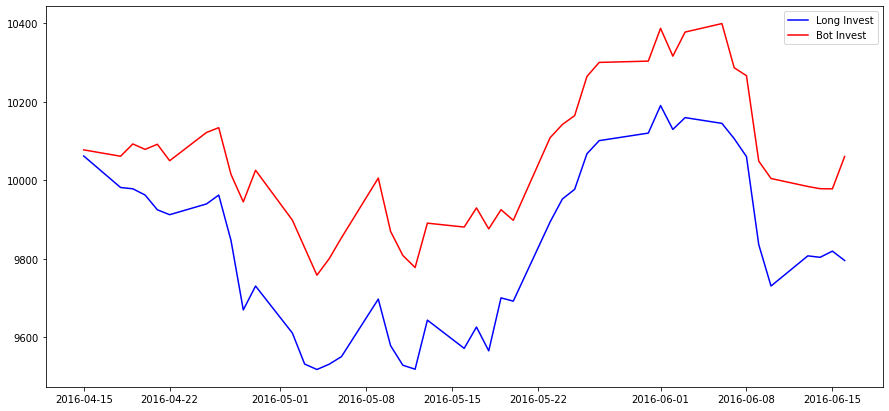

Long-Term Investment: 9795.35 ( -2.05 % )
Bot Trading: 10060.29 ( 0.6 % )


In [58]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


stocks = pd.read_csv('combined_stock_inputs.csv')
print(stocks.columns)

stocks['Date'] = pd.to_datetime(stocks['Date'])
# Sort values in stock sentiment/pricing data by date and ticker name
stocks = stocks.sort_values(['Date', 'Ticker'])

# Use first 2 months of data as train data
d_train = stocks.loc[stocks['Date'] < datetime.datetime(year=2016, month=4, day=15)].reset_index(drop=True)

# Use last 2-3 months as test data
d_test = stocks.loc[stocks['Date'] >= datetime.datetime(year=2016, month=4, day=15)].reset_index(drop=True)

# Remove extra columns from train data
X_train = d_train[['Sentiment_Weighted', 'Sentiment_MA', 'Tweets', 'Tweets_MA']].values
y_train = d_train['Percent_Change_Bin'].values

# Remove extra solumns from test data
X_test = d_test[['Sentiment_Weighted', 'Sentiment_MA', 'Tweets', 'Tweets_MA']].values
y_test = d_test['Percent_Change_Bin'].values

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print('\n')

# Define random forest classifier
model = RandomForestClassifier(random_state=1)

# Train model with training data
model.fit(X_train, y_train)

# Predict the test data
preds = model.predict(X_test)

# Print the percent of predictions that resulted in investing in a losing stock
print(len(np.where((preds > 0) & (y_test == 0))[0]) / len(preds))
print('\n')

# Add predictions to test dataset
d_test['Prediction'] = preds

# Capital to test model effectiveness
bot_capital = 10000
long_capital = 10000

# Add capital as first data points
bots = [bot_capital]
longs = [long_capital]

dates = d_test['Date'].sort_values().unique()

for date in dates:
    # filter dataframe to date
    temp = d_test[d_test['Date'] == date]

    # Calculate profit from investing equal parts to all tickers in timeframe
    long_capital = long_capital + ((long_capital / len(temp)) * (temp['Percent_Change'] / 100)).sum()

    # Calculate profit from using the Twitter bot to determine what stocks to invest in
    temp = temp[temp['Prediction'] > 0]
    bot_capital = bot_capital + ((bot_capital / len(temp)) * (temp['Percent_Change'] / 100)).sum()

    # Keep track of the account totals over time
    longs.append(long_capital)
    bots.append(bot_capital)


# Plot the accounts balances over time
plt.figure(figsize=(15,7))
plt.plot(dates, longs[1:], c='b', label='Long Invest')
plt.plot(dates, bots[1:], c='r', label='Bot Invest')
plt.legend()
plt.show()

# Show the return from each account over time
print('Long-Term Investment:', round(longs[-1], 2), '(', round((longs[-1] - longs[0]) / longs[0] * 100, 2), '% )')
print('Bot Trading:', round(bots[-1], 2), '(', round((bots[-1] - bots[0]) / bots[0] * 100, 2), '% )')

***Adding LSTM Model***

1/1 [==============================] - 0s 23ms/step
train score = [[0.        ]
 [1.05142561]
 [0.68251211]
 [1.8592783 ]
 [7.18585001]
 [8.11620016]
 [8.49423513]
 [6.47662051]
 [5.17283104]
 [4.10044859]
 [3.37321529]
 [2.79239797]
 [2.41500542]
 [2.14975552]
 [1.86400134]
 [1.83445555]
 [2.55316867]
 [3.89652661]]
test score = [[ 0.        ]
 [32.20863723]
 [16.87940454]
 [ 8.6035747 ]
 [ 5.54538914]
 [ 3.59173583]
 [ 2.64425732]
 [ 5.10741197]
 [ 9.03076057]
 [ 8.23187956]
 [ 7.11910662]
 [ 6.03853296]
 [ 5.25810913]
 [ 4.81529542]
 [ 5.54488674]
 [ 8.10597006]
 [ 8.3239576 ]
 [ 8.73726768]
 [ 8.15167213]
 [ 7.31620419]
 [ 6.60421396]
 [ 5.99023504]
 [ 6.1330884 ]
 [ 6.5201296 ]
 [ 6.55839073]
 [ 6.43867395]
 [ 5.95401403]
 [ 5.52206211]
 [ 5.17308593]
 [ 5.30721081]]


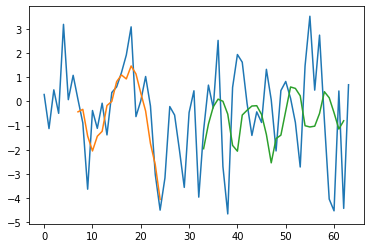

1/1 [==============================] - 0s 22ms/step
train score = [[0.        ]
 [0.00177879]
 [0.13412289]
 [0.07421876]
 [0.04193844]
 [0.02907564]
 [0.08757701]
 [0.06941825]
 [0.05690307]
 [0.05307796]
 [0.06063431]
 [0.05493318]
 [0.04616451]
 [0.042406  ]
 [0.03887765]
 [0.03386689]
 [0.03214597]
 [0.04224015]
 [0.0383537 ]
 [0.03647814]
 [0.03413323]
 [0.03112215]]
test score = [[0.        ]
 [0.00405526]
 [0.0026939 ]
 [0.01249518]
 [0.00871915]
 [0.02449948]
 [0.01834954]
 [0.08471458]
 [0.06952801]
 [0.2200752 ]
 [0.21996723]
 [0.2382107 ]
 [0.31653015]
 [0.27054591]
 [0.23333265]
 [0.20842907]
 [0.20505829]
 [0.22683025]
 [0.24478182]
 [0.23130541]
 [0.24480113]
 [0.24841854]
 [0.27761861]
 [0.28414001]
 [0.26135039]
 [0.24219777]
 [0.22538071]
 [0.20900992]
 [0.20242163]
 [0.20849219]]


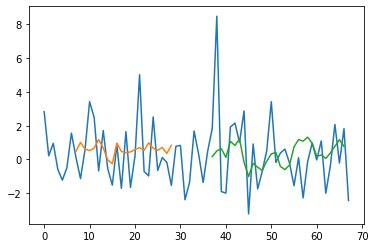

1/1 [==============================] - 0s 23ms/step
train score = [[0.        ]
 [0.09203461]
 [0.03052563]
 [0.0158489 ]
 [0.01143123]
 [0.01093397]
 [0.0192648 ]
 [0.04187909]
 [0.06549764]
 [0.0704199 ]
 [0.1088658 ]
 [0.09082785]
 [0.07722741]
 [0.0658041 ]
 [0.05695293]
 [0.0641472 ]
 [0.08676611]
 [0.14688059]]
test score = [[0.00000000e+00]
 [5.65168119e-04]
 [5.06779404e-02]
 [6.89282669e-01]
 [6.12719105e-01]
 [3.93357172e-01]
 [2.77339004e-01]
 [2.04057256e-01]
 [1.59956161e-01]
 [1.28596578e-01]
 [4.50793514e-01]
 [4.88863835e-01]
 [4.38668839e-01]
 [3.82186033e-01]
 [3.37421368e-01]
 [2.96107309e-01]
 [2.62063008e-01]
 [2.61489148e-01]
 [2.88527882e-01]
 [3.79994247e-01]
 [3.92718245e-01]
 [4.16927839e-01]
 [4.41725393e-01]
 [4.22570247e-01]
 [4.42740060e-01]
 [4.12511605e-01]
 [3.81398466e-01]
 [3.54170235e-01]
 [3.30500756e-01]
 [3.10103365e-01]]


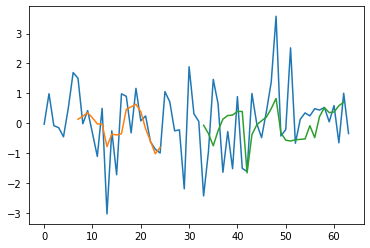

1/1 [==============================] - 0s 30ms/step
train score = [[0.        ]
 [0.14278632]
 [0.04153173]
 [0.03032391]
 [0.1203139 ]
 [0.23858049]
 [0.17215336]
 [0.15270571]
 [0.11887755]
 [0.13870161]
 [0.1128232 ]
 [0.10945189]
 [0.09966697]
 [0.11316517]
 [0.14031354]
 [0.20158833]
 [0.18393228]
 [0.17336372]]
test score = [[0.        ]
 [0.0043206 ]
 [0.01822673]
 [0.012995  ]
 [0.38328898]
 [0.3951443 ]
 [0.61630103]
 [0.53275231]
 [0.42855482]
 [0.34242668]
 [0.52769377]
 [0.43633276]
 [0.36678415]
 [0.32671383]
 [0.31694094]
 [0.32286988]
 [0.28412649]
 [0.25248942]
 [0.22957145]
 [0.22665982]
 [0.22667366]
 [0.23259383]
 [0.21333786]
 [0.19527264]
 [0.28274358]
 [0.28533509]
 [0.35589523]
 [0.34930968]
 [0.32592181]
 [0.30387648]]


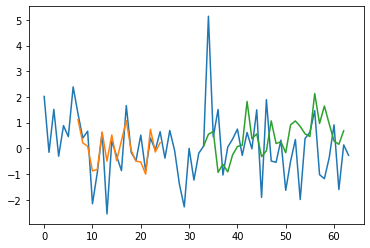

1/1 [==============================] - 0s 21ms/step
Unexpected result of `predict_function` (Empty batch_outputs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.


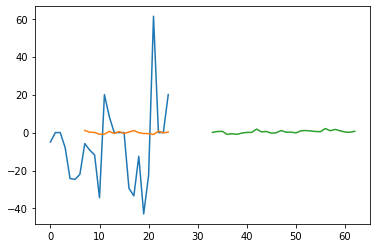

1/1 [==============================] - 0s 23ms/step
train score = [[0.        ]
 [0.0336774 ]
 [0.07259977]
 [0.04026387]
 [0.03131922]
 [0.04479928]
 [0.04988355]
 [0.06883983]
 [0.09187537]
 [0.08943934]
 [0.09071491]
 [0.10280031]
 [0.09135053]
 [0.08834775]
 [0.08451458]
 [0.07626495]
 [0.06703281]
 [0.06286532]]
test score = [[0.        ]
 [0.13866537]
 [0.32041338]
 [0.14920421]
 [0.11393806]
 [0.09938263]
 [0.12897495]
 [0.13143915]
 [0.28602381]
 [0.31446885]
 [0.37030205]
 [0.45919037]
 [0.4653997 ]
 [0.45667385]
 [0.48490122]
 [0.46378981]
 [0.431228  ]
 [0.40153226]
 [0.37333882]
 [0.345605  ]
 [0.31339685]
 [0.28612834]
 [0.26844771]
 [0.24674901]]


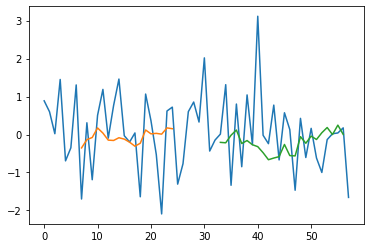

1/1 [==============================] - 0s 22ms/step
train score = [[0.        ]
 [0.37013601]
 [0.24749295]
 [0.17356724]
 [0.13598278]
 [0.12491722]
 [0.13299907]
 [0.13172795]
 [0.12771566]
 [0.1422995 ]
 [0.12948893]
 [0.12777629]
 [0.13459972]
 [0.12843789]
 [0.12410464]
 [0.12456877]
 [0.1243719 ]
 [0.1118163 ]]
test score = [[0.        ]
 [0.17772269]
 [0.43537672]
 [0.42800664]
 [0.35483338]
 [0.43315899]
 [0.42243462]
 [0.60195017]
 [0.64521304]
 [0.6024312 ]
 [0.57794121]
 [0.53277523]
 [0.49968433]
 [0.45202703]
 [0.40576691]
 [0.37533196]
 [0.34988782]
 [0.33832666]
 [0.36162204]
 [0.34643882]
 [0.34761106]
 [0.34628694]
 [0.35371123]]


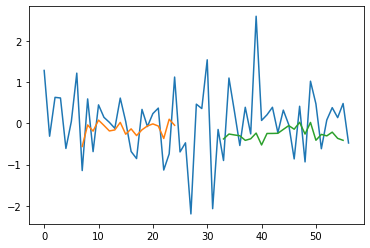

1/1 [==============================] - 0s 22ms/step
train score = [[0.        ]
 [0.05058128]
 [0.05247941]
 [0.03714499]
 [0.02278617]
 [0.01910145]
 [0.03029362]
 [0.02251759]
 [0.02015824]
 [0.01608271]
 [0.01303376]
 [0.01799788]
 [0.03569934]
 [0.03041972]
 [0.03071438]
 [0.02954057]
 [0.03890889]
 [0.03523635]]
test score = [[0.        ]
 [0.01222261]
 [0.00470774]
 [0.00794989]
 [0.01147564]
 [0.03033519]
 [0.02251382]
 [0.02767119]
 [2.5350291 ]
 [2.33912319]
 [2.2791065 ]
 [1.91239327]
 [1.66978363]
 [1.56872474]
 [1.35715061]
 [1.18256909]
 [1.05296894]
 [0.9417318 ]
 [0.9186525 ]
 [0.88285826]
 [0.8892218 ]
 [0.98605518]
 [0.91714189]
 [0.84166476]]


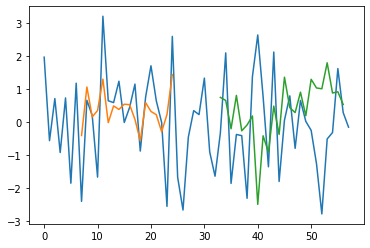

1/1 [==============================] - 0s 21ms/step
train score = [[0.        ]
 [2.51228555]
 [0.95947507]
 [0.48782279]
 [0.28742174]
 [0.26036337]
 [0.37402568]
 [0.38763356]
 [0.32923403]
 [0.30829405]
 [0.24995945]
 [0.3471032 ]
 [0.33018053]
 [0.28149097]
 [0.25928611]
 [0.32962804]
 [0.40265602]
 [0.86283264]]
test score = [[0.        ]
 [1.0052785 ]
 [0.84765372]
 [1.91987895]
 [1.39558744]
 [1.55856456]
 [1.60529235]
 [2.08880234]
 [1.7615494 ]
 [1.69101522]
 [1.47224309]
 [2.07891413]
 [2.05474185]
 [2.20855703]
 [2.1337476 ]
 [2.13910247]
 [1.94224728]
 [2.10495331]
 [2.21435086]
 [2.40043528]
 [2.32076887]
 [2.10535834]
 [2.13883732]
 [3.04163334]]


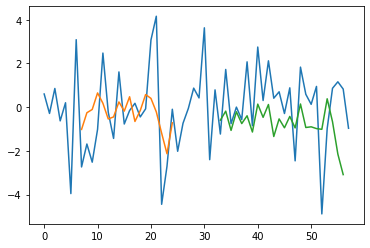

1/1 [==============================] - 0s 29ms/step
train score = [[0.        ]
 [9.93399606]
 [2.88447947]
 [1.30048728]
 [0.73603931]
 [0.47309615]
 [0.32869062]
 [0.24714713]
 [0.19038048]
 [0.15684531]
 [0.12821904]
 [0.1217727 ]
 [0.11640874]
 [0.14324724]
 [0.1448035 ]
 [0.12905226]
 [0.17320786]
 [0.18419323]]
test score = [[0.        ]
 [0.15660751]
 [0.17815688]
 [0.08661704]
 [0.05618729]
 [0.03688993]
 [0.03872972]
 [0.06170047]
 [0.24339661]
 [0.55562887]
 [0.86768168]
 [1.21824327]
 [1.74520198]
 [2.09200488]
 [2.37875922]
 [2.86491168]
 [3.42097078]
 [3.68799544]
 [3.57374628]
 [3.53799943]
 [3.41124474]
 [3.37934868]
 [3.29688924]
 [3.2445065 ]]


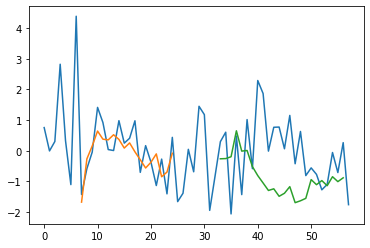

1/1 [==============================] - 0s 21ms/step
train score = [[0.        ]
 [2.43685757]
 [0.60939653]
 [0.39826221]
 [0.27959857]
 [0.24114124]
 [0.51762679]
 [0.43078015]
 [0.35489691]
 [0.34858937]
 [0.28366817]
 [0.57003635]
 [0.5744985 ]
 [0.50485611]
 [0.44977672]
 [0.40049631]
 [0.37201324]
 [0.35129334]]
test score = [[ 0.        ]
 [ 0.0656156 ]
 [ 0.5139237 ]
 [ 1.22143484]
 [ 0.81293729]
 [ 1.36180477]
 [ 1.67943945]
 [ 2.35204295]
 [ 3.0046012 ]
 [ 3.86204253]
 [ 4.6242696 ]
 [ 4.83496305]
 [ 4.69593666]
 [ 4.40129929]
 [ 4.22156493]
 [ 9.18375131]
 [ 9.88845374]
 [14.54420797]
 [13.06486688]
 [13.54423966]
 [13.03435063]
 [11.88274535]
 [10.85467819]
 [10.19505924]]


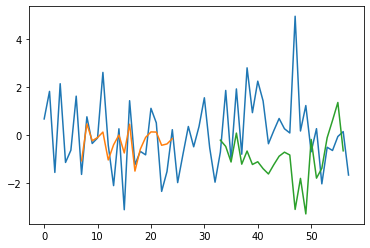

1/1 [==============================] - 0s 23ms/step
train score = [[ 0.        ]
 [87.6130517 ]
 [35.80229067]
 [21.93078176]
 [12.61323107]
 [ 8.29177985]
 [ 5.86251411]
 [ 4.45364767]
 [ 3.48535195]
 [ 2.75496021]
 [ 2.30800876]
 [ 1.93099947]
 [ 1.62535414]
 [ 1.50343706]
 [ 1.36081972]
 [ 1.55495923]
 [ 2.95686101]
 [ 2.68714903]]
test score = [[ 0.        ]
 [66.40474098]
 [52.20785279]
 [72.6215174 ]
 [58.56655769]
 [69.00538389]
 [72.32666305]
 [79.39872313]
 [83.5237377 ]
 [90.43434284]
 [84.28864872]
 [86.56554244]
 [81.83139513]
 [80.36961202]
 [77.21833352]
 [76.26728468]
 [76.70705904]
 [75.72153712]
 [71.4699124 ]
 [67.63770181]
 [66.35048911]
 [63.27001829]
 [61.84739868]]


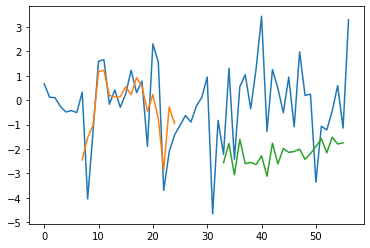

1/1 [==============================] - 0s 23ms/step
train score = [[0.        ]
 [1.37258046]
 [0.3780054 ]
 [0.27188683]
 [0.8107736 ]
 [0.62377809]
 [0.52861473]
 [0.44869375]
 [0.45525847]
 [0.56572437]
 [0.7874773 ]
 [0.9111272 ]
 [0.94231671]
 [0.87475886]
 [0.80723785]
 [0.77434074]
 [0.89949293]
 [0.90980594]]
test score = [[0.        ]
 [4.39824401]
 [5.87502246]
 [3.20340823]
 [4.38916733]
 [6.31548735]
 [4.47389189]
 [3.9317458 ]
 [3.5176687 ]
 [3.19714822]
 [3.75024585]
 [3.52958078]
 [3.50310272]
 [3.03009846]
 [2.63640044]
 [2.55671402]
 [2.59465516]
 [2.57082985]
 [2.34028339]
 [2.31994137]
 [2.26664938]
 [2.07169753]
 [1.96046584]
 [1.80772777]]


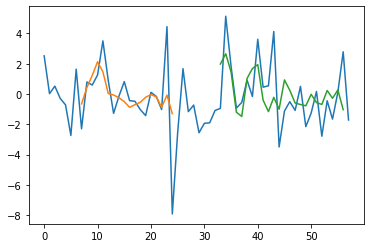

1/1 [==============================] - 0s 24ms/step
train score = [[0.        ]
 [0.54320796]
 [0.24708618]
 [0.20033261]
 [0.16358763]
 [0.12550758]
 [0.1108737 ]
 [0.0814607 ]
 [0.06240359]
 [0.05197644]
 [0.04719761]
 [0.04824356]
 [0.04156796]
 [0.03541891]
 [0.03242716]
 [0.03985752]
 [0.09232203]
 [0.14281938]]
test score = [[ 0.        ]
 [ 6.6029426 ]
 [ 1.93918486]
 [ 1.62662149]
 [ 1.72692293]
 [ 5.27092396]
 [ 7.73329823]
 [ 9.72295393]
 [12.59325962]
 [13.4836305 ]
 [15.57169023]
 [18.73611396]
 [19.00836668]
 [17.85928937]
 [17.11645438]
 [15.82998506]
 [14.2064666 ]
 [12.84117762]
 [12.05375736]
 [11.6321909 ]
 [11.12583639]
 [10.38189723]
 [ 9.54037438]]


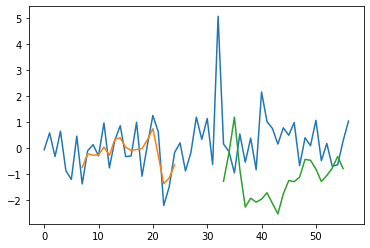

1/1 [==============================] - 0s 22ms/step
train score = [[0.        ]
 [0.00786061]
 [0.03095767]
 [0.0140001 ]
 [0.0134784 ]
 [0.01033623]
 [0.00911409]
 [0.01619336]
 [0.01922764]
 [0.0168137 ]
 [0.01667349]
 [0.02219023]
 [0.03574088]
 [0.07244141]
 [0.11832107]
 [0.16415812]
 [0.21049938]
 [0.22082051]]
test score = [[0.        ]
 [1.34450951]
 [1.65005787]
 [0.90151358]
 [0.60716084]
 [0.65563636]
 [0.61110083]
 [0.46860489]
 [0.3587827 ]
 [0.36811884]
 [0.56230758]
 [0.83484842]
 [1.15213651]
 [1.39157283]
 [1.75146559]
 [1.7146315 ]
 [1.51942178]
 [1.35257722]
 [1.28851432]
 [1.17376369]
 [1.07668904]
 [1.02249666]
 [0.93397604]
 [0.87475236]]


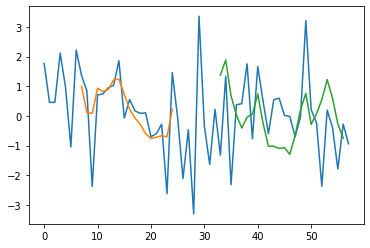

1/1 [==============================] - 0s 21ms/step
train score = [[0.        ]
 [2.75689406]
 [1.11086955]
 [0.69998202]
 [0.59541629]
 [0.57322078]
 [0.57665356]
 [0.5694938 ]
 [0.63024638]
 [0.65616275]
 [0.55933176]
 [0.47456917]
 [0.4124606 ]
 [0.3763774 ]
 [0.3514601 ]
 [0.34244356]
 [0.34700549]
 [0.32827761]]
test score = [[0.        ]
 [0.09882607]
 [0.08378502]
 [0.03782474]
 [0.02169482]
 [0.03228932]
 [0.17164061]
 [0.41149075]
 [0.50811919]
 [0.53763977]
 [0.52830262]
 [0.54213673]
 [0.60712477]
 [0.61299709]
 [0.61327541]
 [0.59556636]
 [0.56715615]
 [0.54768831]
 [0.53428454]
 [0.53534222]
 [0.50551227]
 [0.47128911]
 [0.45805572]
 [0.437666  ]]


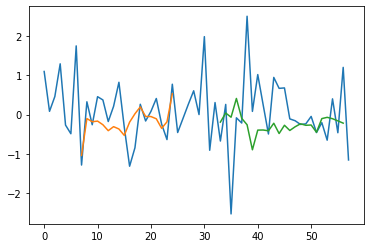

1/1 [==============================] - 0s 21ms/step
train score = [[0.        ]
 [5.02390789]
 [3.95032915]
 [2.42225773]
 [1.37854495]
 [0.89263097]
 [0.65495212]
 [0.95533493]
 [0.73562629]
 [0.61660891]
 [0.50078492]
 [0.62316272]
 [0.52530864]
 [0.44807041]
 [0.38770361]
 [0.34073735]
 [0.54286599]
 [0.62908155]]
test score = [[ 0.        ]
 [10.7129889 ]
 [18.27512567]
 [17.57182277]
 [15.02776905]
 [15.75323373]
 [17.36565561]
 [12.77710378]
 [13.32088412]
 [11.50245395]
 [ 9.61866772]
 [ 8.0101598 ]
 [ 6.74902613]
 [ 5.77522023]
 [ 4.98491896]
 [ 6.02704148]
 [ 6.8529626 ]
 [ 8.27250606]
 [ 8.7067917 ]
 [ 8.76603238]
 [ 8.35525165]
 [ 7.90121958]
 [ 7.56920321]
 [ 7.26115098]]


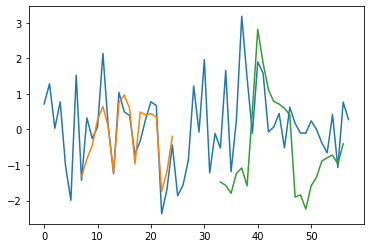

1/1 [==============================] - 0s 20ms/step
train score = [[0.        ]
 [1.67664423]
 [0.86448212]
 [0.8178806 ]
 [0.56931664]
 [0.3745628 ]
 [0.31930785]
 [0.2403015 ]
 [0.18516474]
 [0.16158607]
 [0.13176199]
 [0.17741141]
 [0.15201946]
 [0.14079545]
 [0.12257252]
 [0.10744657]
 [0.1268402 ]
 [0.11299769]]
test score = [[0.        ]
 [0.52297884]
 [0.20203492]
 [0.29694598]
 [0.36597573]
 [0.53103323]
 [0.49962253]
 [0.37131922]
 [0.32777298]
 [0.26711069]
 [0.22206445]
 [0.19038925]
 [0.16079383]
 [0.14356799]
 [0.12800194]
 [0.11179124]
 [0.10044486]
 [0.09816866]
 [0.08762072]
 [0.08015468]
 [0.07238997]
 [0.06592019]
 [0.0681968 ]
 [0.07390646]]


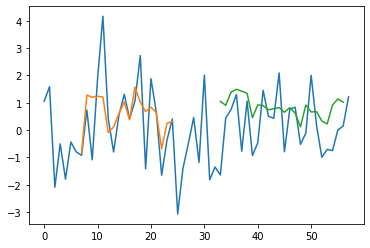

1/1 [==============================] - 0s 26ms/step
train score = [[0.        ]
 [0.18526245]
 [0.20778529]
 [0.14811979]
 [0.0836925 ]
 [0.06815918]
 [0.06546953]
 [0.05296311]
 [0.04251328]
 [0.03544041]
 [0.04869167]
 [0.05451073]
 [0.14191498]
 [0.33423931]
 [0.37063548]
 [0.50517055]
 [0.46242588]
 [1.47782162]]
test score = [[0.        ]
 [2.21359997]
 [0.72647595]
 [0.3250176 ]
 [0.19457469]
 [0.20643631]
 [0.40886291]
 [0.32982209]
 [0.32431024]
 [0.5332681 ]
 [0.43703362]
 [0.3697071 ]
 [0.31902093]
 [0.28012388]
 [0.24305229]
 [0.21625379]
 [0.19033441]
 [0.20178067]
 [0.21990111]
 [0.20920097]
 [0.25602653]
 [0.29563255]
 [0.32144768]]


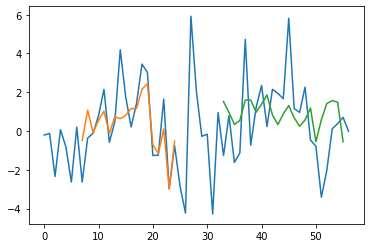

1/1 [==============================] - 0s 26ms/step
train score = [[0.        ]
 [0.11714214]
 [0.22175245]
 [0.12850439]
 [0.3507432 ]
 [0.23465174]
 [0.18172796]
 [0.1382749 ]
 [0.11481354]
 [0.09487205]
 [0.13127467]
 [0.15747925]
 [0.14166954]
 [0.12364939]
 [0.11264543]
 [0.17067591]
 [0.15018247]
 [0.13303456]]
test score = [[0.00000000e+00]
 [3.68765333e-01]
 [9.81925573e-02]
 [3.90139652e-01]
 [4.90132541e-01]
 [1.10570358e+00]
 [7.80937831e-01]
 [9.02626087e-01]
 [7.45328636e-01]
 [6.57845647e-01]
 [8.47437095e-01]
 [3.14263896e+00]
 [1.70225986e+01]
 [4.76942775e+01]
 [9.05193348e+01]
 [1.14801883e+02]
 [1.48198206e+02]
 [1.88573448e+02]
 [2.17384579e+02]
 [2.37549656e+02]
 [2.69627940e+02]
 [3.00956046e+02]
 [3.22474898e+02]
 [2.95550523e+02]]


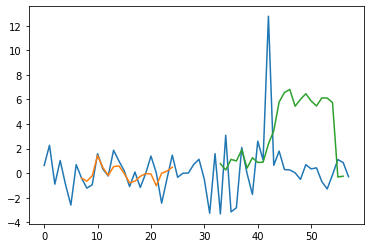

1/1 [==============================] - 0s 22ms/step
train score = [[ 0.        ]
 [25.34881972]
 [ 7.14408626]
 [ 4.146103  ]
 [ 2.38394077]
 [ 1.54657764]
 [ 1.15622546]
 [ 1.93461054]
 [ 1.48128492]
 [ 1.17369791]
 [ 0.96095121]
 [ 0.99673654]
 [ 0.86751393]
 [ 0.78093347]
 [ 0.68595225]
 [ 1.37772796]
 [ 1.32688643]
 [ 1.20926927]]
test score = [[  0.        ]
 [ 50.70561309]
 [ 48.52647421]
 [ 91.3966576 ]
 [257.54599516]
 [675.3014378 ]
 [570.46450849]
 [668.30277691]
 [748.31679436]
 [832.32199251]
 [684.10360535]
 [569.88542102]
 [685.90883415]
 [871.45453969]
 [805.1478273 ]
 [704.91001601]
 [621.06082801]
 [550.14585505]
 [497.69968385]
 [446.72361127]
 [411.45016631]
 [374.23765391]
 [348.44764346]
 [323.44374364]]


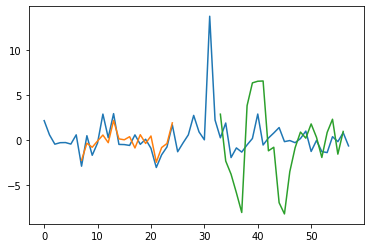

1/1 [==============================] - 0s 21ms/step
train score = [[  0.        ]
 [726.50003158]
 [181.90484276]
 [ 82.19021455]
 [ 47.15470001]
 [ 30.20106037]
 [ 21.66451622]
 [ 17.24296855]
 [ 14.56053113]
 [ 11.96387419]
 [  9.79748373]
 [  8.42602969]
 [  7.60765003]
 [  6.530992  ]
 [  5.64344045]
 [  4.96940902]
 [  4.41606969]
 [  4.11467692]]
test score = [[0.00000000e+00]
 [1.30748409e-01]
 [1.42140821e-01]
 [1.28332144e+02]
 [2.16469521e+02]
 [3.31837053e+02]
 [3.63505398e+02]
 [3.70340996e+02]
 [2.85444626e+02]
 [2.27422854e+02]
 [1.84780399e+02]
 [2.53658727e+02]
 [2.99424267e+02]
 [3.35956209e+02]
 [3.61089029e+02]
 [4.01031802e+02]
 [4.74014524e+02]
 [4.87110806e+02]
 [5.19873921e+02]
 [5.28204589e+02]
 [5.40465670e+02]
 [5.41369226e+02]
 [5.45373768e+02]
 [5.21816562e+02]]


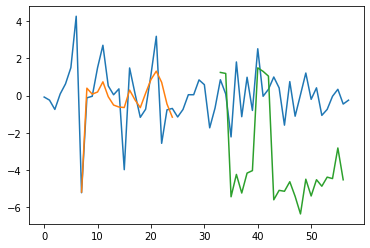

1/1 [==============================] - 0s 22ms/step
train score = [[  0.        ]
 [106.94123121]
 [119.44875179]
 [110.23556444]
 [ 84.9885919 ]
 [ 83.21675126]
 [ 87.03742362]
 [ 64.70332818]
 [ 64.16313701]
 [ 67.42834253]
 [ 72.91747359]
 [ 66.11249941]
 [ 56.34954883]
 [ 66.30818118]
 [ 91.79377951]
 [100.06322334]
 [107.70910395]
 [108.31094213]]
test score = [[  0.        ]
 [ 48.40648059]
 [ 26.34424905]
 [ 18.74389587]
 [ 84.37974655]
 [ 76.23279713]
 [ 66.71239586]
 [ 49.08008526]
 [ 37.93374279]
 [ 40.7372583 ]
 [ 48.42893739]
 [ 54.85005479]
 [ 59.02861067]
 [ 67.34238403]
 [ 65.95311065]
 [ 67.91936114]
 [ 78.6520735 ]
 [ 93.34845826]
 [ 92.49712637]
 [ 96.68846014]
 [101.54716154]
 [ 95.38414631]
 [ 94.14015324]
 [ 95.91762758]]


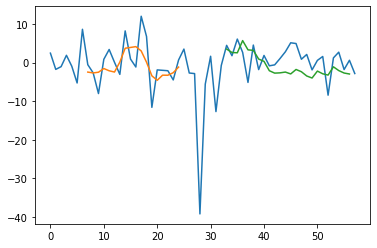

1/1 [==============================] - 0s 22ms/step
train score = [[0.00000000e+00]
 [7.90728490e-06]
 [1.84532506e-03]
 [3.83778918e-03]
 [3.36152285e-03]
 [2.79505335e-03]
 [1.44435507e-02]
 [1.67009736e-02]
 [1.79203190e-02]
 [1.41595976e-02]
 [1.56151655e-02]
 [1.29062634e-02]
 [1.19286382e-02]
 [1.01677560e-02]
 [1.04365838e-02]
 [2.16532680e-02]
 [4.10169861e-02]
 [5.33787679e-02]]
test score = [[0.00000000e+00]
 [1.43736593e-04]
 [3.94948984e-05]
 [2.64439379e-04]
 [2.98975720e-03]
 [2.25947672e-03]
 [1.70465689e-02]
 [1.61906820e-02]
 [1.55975795e-01]
 [1.32058789e-01]
 [2.33337939e-01]
 [1.95673537e-01]
 [3.82057148e-01]
 [3.35310079e-01]
 [2.89127295e-01]
 [2.52038651e-01]
 [2.60856330e-01]
 [2.31347660e-01]
 [2.12582981e-01]
 [1.92760897e-01]
 [1.74470280e-01]
 [1.58444274e-01]
 [1.47040680e-01]
 [1.34741182e-01]]


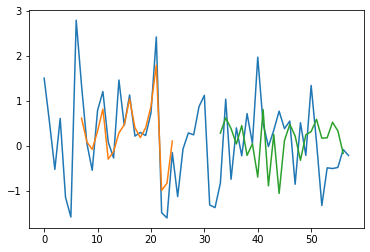

1/1 [==============================] - 0s 39ms/step
train score = [[0.        ]
 [0.01103981]
 [0.03214817]
 [0.05469108]
 [0.0669381 ]
 [0.05405036]
 [0.04423327]
 [0.03701668]
 [0.05260333]
 [0.07075127]
 [0.15636285]
 [0.26495044]
 [0.22883984]
 [0.2181918 ]
 [0.20957544]
 [0.19027498]
 [0.16985648]
 [0.150587  ]]
test score = [[0.        ]
 [0.16214077]
 [0.09424155]
 [0.07386516]
 [0.07148767]
 [0.08960972]
 [0.16797783]
 [0.26134354]
 [0.48838552]
 [0.5544808 ]
 [0.55488656]
 [0.59498279]
 [0.61957336]
 [0.61339583]
 [0.59189973]
 [0.56002163]
 [0.53692952]
 [0.54069509]
 [0.52864987]
 [0.51478667]
 [0.4843496 ]
 [0.44444071]
 [0.41449802]
 [0.38441416]]


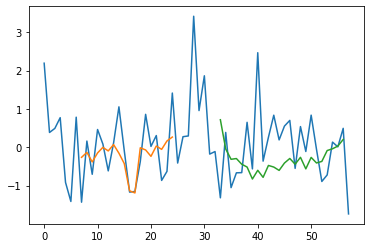

1/1 [==============================] - 0s 22ms/step
train score = [[ 0.        ]
 [12.39841151]
 [ 4.93075907]
 [ 2.19598972]
 [ 1.23779837]
 [ 0.99696255]
 [ 0.96294379]
 [ 0.89068918]
 [ 0.68929859]
 [ 0.55007481]
 [ 0.57704872]
 [ 0.5686445 ]
 [ 0.53835055]
 [ 0.48357809]
 [ 0.64585436]
 [ 2.14771943]
 [ 6.54999478]
 [10.14693165]]
test score = [[  0.        ]
 [  7.56110861]
 [  9.24726431]
 [  9.22318909]
 [  9.91393923]
 [  8.98874848]
 [ 11.33565843]
 [ 20.17005004]
 [ 42.23979086]
 [ 82.63338055]
 [135.30145542]
 [186.00977764]
 [242.56762318]
 [290.23699088]
 [337.15174287]
 [384.71334418]
 [421.80618315]
 [441.25422634]
 [452.17638219]
 [456.36594947]
 [457.35023987]
 [464.9357736 ]
 [469.17657166]
 [463.63329622]]


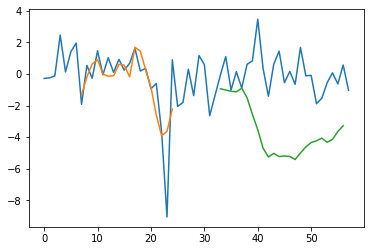

1/1 [==============================] - 0s 26ms/step
train score = [[0.        ]
 [0.20835011]
 [0.12638244]
 [0.06791957]
 [0.07985877]
 [0.08255433]
 [0.10838217]
 [0.09947447]
 [0.09447652]
 [0.10351203]
 [0.1246485 ]
 [0.12890254]
 [0.12652336]
 [0.11297789]
 [0.0978659 ]
 [0.13762289]
 [0.15264998]
 [0.14146833]]
test score = [[0.        ]
 [0.0185427 ]
 [0.01456839]
 [0.00830868]
 [0.04747347]
 [0.13998917]
 [0.21246832]
 [0.4586425 ]
 [0.59251448]
 [0.62108828]
 [0.65630381]
 [0.59751648]
 [0.50266885]
 [0.45590289]
 [0.42285322]
 [0.49679346]
 [0.52177447]
 [0.51256058]
 [0.46290388]
 [0.41829824]
 [0.3976905 ]]


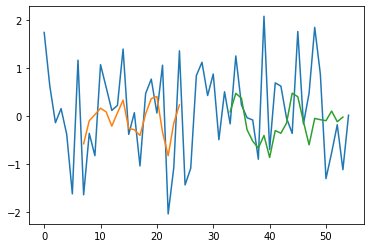

1/1 [==============================] - 0s 20ms/step
train score = [[ 0.        ]
 [25.04544677]
 [19.28791917]
 [20.22363705]
 [21.96104877]
 [22.68529398]
 [25.27361403]
 [24.72953671]
 [24.37550943]
 [21.38731367]
 [17.48368751]
 [16.24241522]
 [18.34980865]
 [16.24114522]
 [15.09291159]
 [17.33080882]
 [19.95735293]
 [19.96441908]]
test score = [[0.        ]
 [4.43269153]
 [2.86975323]
 [3.29070752]
 [2.04395734]
 [3.43215052]
 [2.7722682 ]
 [3.57997883]
 [3.61179529]
 [3.37233891]
 [3.5900098 ]
 [4.38186903]
 [4.34915973]
 [4.65147976]
 [7.28369245]
 [8.20867469]
 [8.02709233]
 [7.68555275]
 [6.95080753]
 [6.61450838]
 [6.24360547]
 [6.29673521]
 [5.83579005]
 [5.61443189]]


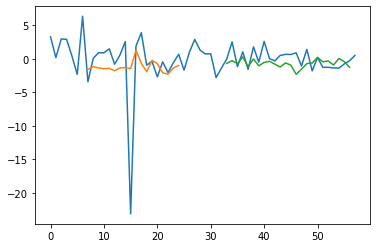

1/1 [==============================] - 0s 22ms/step
train score = [[0.        ]
 [0.47783399]
 [0.76444094]
 [0.5573727 ]
 [0.73375782]
 [0.86829399]
 [0.67044901]
 [0.73664167]
 [0.82137845]
 [1.05201415]
 [1.32585566]
 [1.76916244]
 [2.03618843]
 [2.03356548]
 [1.805101  ]
 [1.82900671]
 [1.67833676]
 [1.60995431]]
test score = [[0.        ]
 [1.50768066]
 [1.7004038 ]
 [2.11556384]
 [1.48517986]
 [1.14701703]
 [1.03967566]
 [0.81307681]
 [0.90172606]
 [0.72601757]
 [0.76594304]
 [0.89441689]
 [0.90224566]
 [0.86563164]
 [1.20495594]
 [1.27180407]
 [1.38710239]
 [1.22873925]
 [1.13438154]
 [1.08382447]
 [1.00801972]
 [0.95569243]
 [0.93002657]
 [0.97410931]]


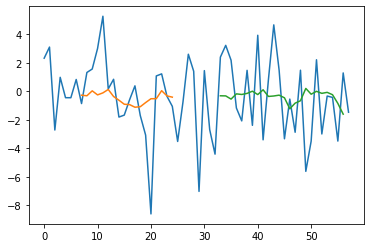

1/1 [==============================] - 0s 29ms/step
train score = [[0.        ]
 [0.00311515]
 [0.07167455]
 [0.05154197]
 [0.05694028]
 [0.05736761]
 [0.06211904]
 [0.07955261]
 [0.08099185]
 [0.08355403]
 [0.07672421]
 [0.06617034]
 [0.07338179]
 [0.07973161]
 [0.07951789]
 [0.07974159]
 [0.07431781]
 [0.07052936]]
test score = [[0.        ]
 [0.1422818 ]
 [0.24860157]
 [0.11050516]
 [0.0655917 ]
 [0.0707579 ]
 [0.05144325]
 [0.04511036]
 [0.0511482 ]
 [0.06293308]
 [0.06174991]
 [0.06222485]
 [0.05473446]
 [0.05382035]
 [0.05402514]
 [0.05325929]
 [0.0498292 ]
 [0.04616479]
 [0.04640705]
 [0.04623566]
 [0.04415695]
 [0.04110261]
 [0.03831172]
 [0.03583618]]


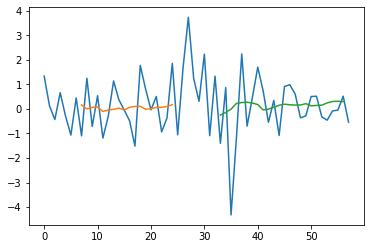

1/1 [==============================] - 0s 27ms/step
train score = [[0.        ]
 [1.65319951]
 [0.53518382]
 [0.27612819]
 [0.23507911]
 [0.30668179]
 [0.53989401]
 [0.54493009]
 [0.47699197]
 [0.50712099]
 [0.49087134]
 [0.40628726]
 [0.35296087]
 [0.30431098]
 [0.36871433]
 [0.40887517]
 [0.390828  ]
 [0.42180348]]
test score = [[  0.        ]
 [153.96747587]
 [ 75.74551369]
 [ 40.40839361]
 [ 26.0008736 ]
 [ 28.71524876]
 [ 36.10434172]
 [ 30.33842706]
 [ 23.35790362]
 [ 19.15913191]
 [ 16.2538591 ]
 [ 13.88296127]
 [ 12.33017384]
 [ 10.76350015]
 [  9.46650769]
 [  8.36585294]
 [  7.60582897]
 [  6.81118136]
 [  6.12617445]
 [  5.50117687]
 [  5.24946766]
 [  5.49108128]]


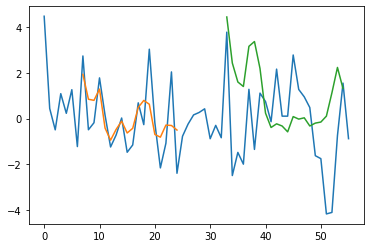

2/2 [==============================] - 0s 5ms/step
train score = [[0.00000000e+00]
 [1.10414189e-07]
 [2.71791872e-05]
 [4.44768486e-05]
 [4.24179327e-05]
 [3.00995273e-03]
 [1.52398737e-02]
 [2.36425124e-02]
 [1.81108798e-02]
 [1.61762239e-02]
 [1.90147838e-02]
 [1.96643732e-02]
 [1.82061573e-02]
 [1.68065157e-02]
 [1.57961567e-02]
 [1.59864040e-02]
 [2.42659806e-02]
 [2.66314013e-02]
 [2.43713071e-02]
 [3.70104853e-02]
 [4.54542404e-02]
 [5.46552381e-02]
 [6.58374111e-02]
 [6.93053815e-02]
 [7.51551020e-02]
 [7.93372392e-02]
 [8.18822814e-02]
 [7.76845593e-02]
 [8.37547542e-02]
 [8.91931172e-02]
 [8.50745518e-02]
 [8.74011959e-02]
 [9.88117371e-02]
 [9.31719354e-02]
 [8.77862476e-02]
 [8.59353923e-02]]
test score = [[0.        ]
 [0.39580135]
 [0.17039639]
 [0.20611094]
 [0.25667718]
 [0.16709532]
 [0.11756193]
 [0.10373273]
 [0.0923062 ]
 [0.08105161]
 [0.09883054]
 [0.11076684]
 [0.09679098]
 [0.09946287]
 [0.09481778]
 [0.0852757 ]
 [0.08659479]
 [0.08641341]
 [0.08153713]
 [0.084

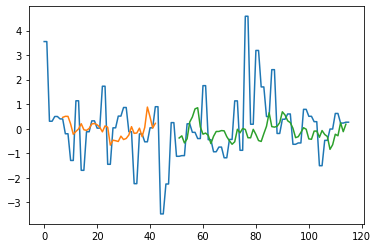

1/1 [==============================] - 0s 28ms/step
train score = [[0.        ]
 [0.36539834]
 [0.14198546]
 [0.06311323]
 [0.04253195]
 [0.05278912]
 [0.17872533]
 [0.30015312]
 [0.29485639]
 [0.33248834]
 [0.7704017 ]
 [1.17625515]
 [1.86958976]
 [1.63765242]
 [1.41558908]
 [1.58574181]
 [2.18384175]
 [2.32537389]]
test score = [[ 0.        ]
 [ 9.06560349]
 [ 9.45081485]
 [12.7950883 ]
 [13.05900714]
 [17.07132434]
 [20.2657153 ]
 [25.03104252]
 [27.08285805]
 [30.76582631]
 [35.7234653 ]
 [37.97291588]
 [36.92267587]
 [35.2547656 ]
 [35.02513868]
 [36.60332865]
 [36.65016586]
 [37.22724564]
 [36.79448538]
 [37.60937268]
 [37.48560481]
 [38.28640888]
 [38.21101782]
 [38.68731436]]


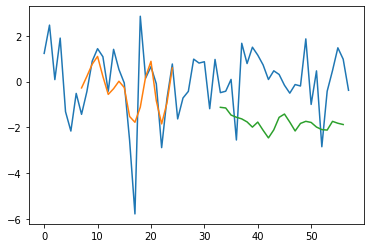

1/1 [==============================] - 0s 23ms/step
train score = [[  0.        ]
 [105.16142495]
 [ 38.89592472]
 [ 19.36036942]
 [ 11.80538669]
 [ 10.51282242]
 [ 14.85280091]
 [ 14.61122171]
 [ 12.34475485]
 [ 10.63282841]
 [  9.32276083]
 [  8.25170831]
 [  6.96329055]
 [  6.1464372 ]
 [  5.30045044]
 [  4.85521505]
 [  4.50523691]
 [  4.35770791]]
test score = [[  0.        ]
 [213.44773155]
 [264.39520747]
 [361.81482944]
 [399.86888092]
 [370.56773825]
 [471.74946143]
 [542.80299082]
 [569.89896699]
 [594.7677123 ]
 [538.97228341]
 [465.91282108]
 [392.47114558]
 [355.83257818]
 [310.76854231]
 [270.75061233]
 [238.14776586]
 [210.95460735]
 [188.63488416]
 [169.98153875]
 [155.21779834]
 [142.4544056 ]
 [130.60152319]
 [122.58664127]]


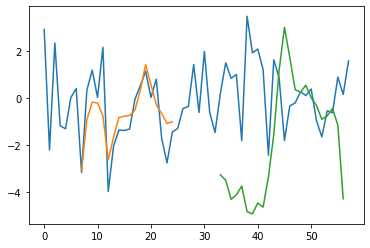

1/1 [==============================] - 0s 44ms/step
train score = [[ 0.        ]
 [ 0.54063354]
 [ 4.60546308]
 [12.45819056]
 [ 8.0662693 ]
 [ 5.16367571]
 [ 3.58860289]
 [ 2.63689439]
 [ 2.13815842]
 [ 1.9507806 ]
 [ 1.61126315]
 [ 1.33162254]
 [ 1.36429833]
 [ 1.2813286 ]
 [ 1.12046572]
 [ 0.9776801 ]
 [ 0.87581262]
 [ 0.78330583]]
test score = [[0.00000000e+00]
 [6.68238430e-05]
 [1.19803839e-01]
 [2.41781585e+00]
 [1.37727013e+00]
 [1.05045478e+00]
 [9.04012468e-01]
 [8.35082637e-01]
 [7.14506712e-01]
 [5.88853982e-01]
 [8.01331101e-01]
 [6.76645304e-01]
 [5.78931086e-01]
 [5.44482980e-01]
 [4.83844154e-01]
 [5.51787111e-01]
 [4.95515860e-01]
 [4.81176262e-01]
 [4.97903836e-01]
 [5.23883987e-01]
 [5.51502762e-01]
 [5.51063942e-01]
 [5.09722730e-01]
 [4.73280535e-01]]


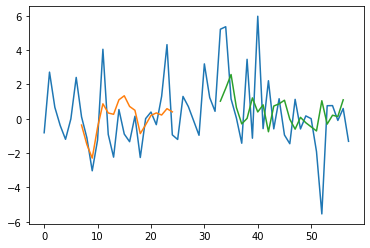

1/1 [==============================] - 0s 22ms/step
train score = [[0.        ]
 [0.00859725]
 [0.01430523]
 [0.01132268]
 [0.0098382 ]
 [0.04493379]
 [0.03127963]
 [0.02899651]
 [0.02241736]
 [0.01786065]
 [0.0148297 ]
 [0.01227549]
 [0.01127008]
 [0.00994075]
 [0.00868044]
 [0.00804738]
 [0.00939612]
 [0.0087396 ]]
test score = [[0.        ]
 [0.10857455]
 [1.94940087]
 [1.14848681]
 [0.99258827]
 [0.84149618]
 [0.60719166]
 [0.45644207]
 [0.41866994]
 [0.33689748]
 [0.47272818]
 [0.45982229]
 [0.48180115]
 [0.41171489]
 [0.35605041]
 [0.31791594]
 [0.28020356]
 [0.25203484]
 [0.23443201]
 [0.21664388]
 [0.20062432]
 [0.19050099]
 [0.17369173]
 [0.16195522]]


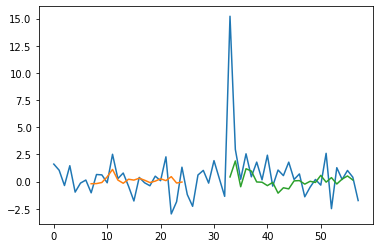

1/1 [==============================] - 0s 23ms/step
train score = [[ 0.        ]
 [35.14259968]
 [ 8.79842142]
 [ 3.91500653]
 [ 2.25364799]
 [ 1.44366312]
 [ 1.38764729]
 [ 1.02149291]
 [ 0.82126939]
 [ 0.65432971]
 [ 0.53962183]
 [ 0.68982189]
 [ 0.80049574]
 [ 0.71744961]
 [ 0.62382265]
 [ 0.60284366]
 [ 0.64385395]
 [ 0.62407599]]
test score = [[0.        ]
 [0.00070802]
 [0.00634666]
 [0.00710392]
 [0.00574188]
 [0.11723347]
 [0.29608798]
 [0.23973971]
 [0.2814981 ]
 [0.61811931]
 [0.53258692]
 [0.44719151]
 [0.41848358]
 [0.3674175 ]
 [0.32074824]
 [0.39877611]
 [0.3545202 ]
 [0.38306705]
 [0.34467891]
 [0.31448636]
 [0.5651308 ]
 [0.52467937]
 [0.48056378]
 [0.44868643]]


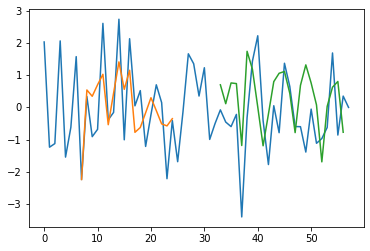

1/1 [==============================] - 0s 24ms/step
train score = [[0.        ]
 [1.74082207]
 [0.44922567]
 [0.20762631]
 [0.17399941]
 [0.12271969]
 [0.11980603]
 [0.09756579]
 [0.09133882]
 [0.07238439]
 [0.06032784]
 [0.06080093]
 [0.05912373]
 [0.06734706]
 [0.06653299]
 [0.10313676]
 [0.27348493]
 [0.3433643 ]]
test score = [[0.        ]
 [0.00775647]
 [0.01619923]
 [0.06107016]
 [0.04207421]
 [1.47606587]
 [1.635808  ]
 [1.54705569]
 [1.38558094]
 [1.81147008]
 [2.56558419]
 [2.71539497]
 [2.413828  ]
 [2.05882666]
 [1.77874854]
 [1.56812575]
 [1.38400125]
 [1.26248517]
 [1.25899852]
 [1.23926031]
 [1.12633848]
 [1.16290268]
 [1.16734439]
 [1.21066563]]


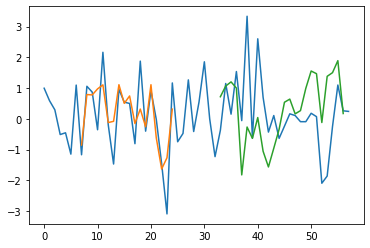

1/1 [==============================] - 0s 24ms/step
train score = [[  0.        ]
 [138.02231545]
 [ 36.59677716]
 [ 16.47496304]
 [  9.44131344]
 [  6.04295052]
 [  5.07317065]
 [  4.46823865]
 [  3.81711214]
 [  3.43266921]
 [  2.83113982]
 [  2.50489179]
 [  2.24090227]
 [  1.97948466]
 [  1.71761449]
 [  1.58446994]
 [  1.49071514]
 [  1.53365245]]
test score = [[0.        ]
 [0.10005603]
 [0.03672787]
 [0.04304275]
 [0.04740821]
 [0.38925852]
 [0.45646661]
 [0.35647181]
 [0.27579627]
 [0.34669411]
 [0.35299463]
 [0.72800321]
 [1.26006093]
 [2.13535419]
 [4.56930968]
 [5.69588612]
 [5.70886575]
 [5.21261055]
 [4.68497873]
 [4.2718278 ]
 [8.05543632]
 [9.78092847]
 [9.16268943]
 [8.5591613 ]]


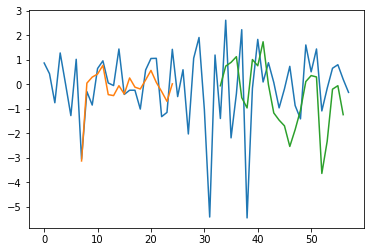

1/1 [==============================] - 0s 29ms/step
train score = [[0.        ]
 [1.47234761]
 [0.66420719]
 [0.39511022]
 [0.24354327]
 [0.17708023]
 [0.182157  ]
 [0.28073572]
 [0.29681938]
 [0.29578422]
 [0.38918826]
 [0.72323397]
 [0.89896274]
 [0.91681483]
 [0.92045126]
 [0.82383952]
 [0.82196573]
 [0.89889989]]
test score = [[0.        ]
 [0.05203187]
 [0.03047879]
 [0.02048687]
 [0.0160599 ]
 [0.01057738]
 [0.00736654]
 [0.00562269]
 [0.00575894]
 [0.00476453]
 [0.00701865]
 [0.00780862]
 [0.00794649]
 [0.00831966]
 [0.00746793]
 [0.00969089]
 [0.01396956]
 [0.01547559]
 [0.01763121]
 [0.0194314 ]
 [0.02039247]
 [0.02171121]
 [0.0255394 ]
 [0.0265791 ]]


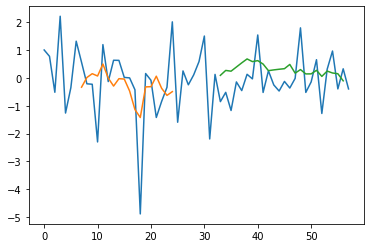

1/1 [==============================] - 0s 22ms/step
train score = [[ 0.        ]
 [ 9.71311619]
 [ 7.18365779]
 [12.32377133]
 [25.66300767]
 [34.94801174]
 [49.10859053]
 [64.59214959]
 [67.58803836]
 [64.53009629]
 [59.41926598]
 [60.02733469]
 [59.46849597]
 [58.08523112]
 [55.81353281]
 [56.66522255]
 [61.24022276]
 [59.76613026]]
test score = [[  0.        ]
 [177.52390698]
 [122.94722745]
 [100.63571813]
 [ 73.84184731]
 [ 79.24893215]
 [ 77.01768595]
 [ 63.17532262]
 [ 50.0731585 ]
 [ 45.98116385]
 [ 46.73612284]
 [ 46.58521798]
 [ 50.05678529]
 [ 51.27463112]
 [ 50.71207785]
 [ 49.77552437]
 [ 47.63943435]
 [ 45.94010848]
 [ 41.9654574 ]
 [ 39.81910976]
 [ 38.50923104]
 [ 36.86386981]
 [ 35.46689922]]


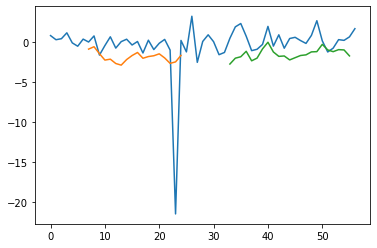

1/1 [==============================] - 0s 25ms/step
train score = [[  0.        ]
 [714.94362502]
 [837.00915318]
 [777.86607978]
 [876.86114436]
 [757.80575297]
 [799.05147668]
 [761.87028995]
 [741.71337243]
 [647.48744891]
 [538.9551361 ]
 [466.81510409]
 [392.66920485]
 [343.01119705]
 [297.18375638]
 [260.22618075]
 [301.22423231]
 [323.60967119]]
test score = [[   0.        ]
 [1482.80794618]
 [1669.0695288 ]
 [1768.69066263]
 [1924.38146633]
 [1705.93225348]
 [1758.3357202 ]
 [1783.62266166]
 [1755.19420485]
 [1715.62865571]
 [1629.76694991]
 [1656.64759364]
 [1694.58857739]
 [1760.78777885]
 [1793.6341323 ]
 [1825.69182596]
 [1771.27872759]
 [1752.53671474]
 [1661.68986741]
 [1664.80517523]
 [1640.19813208]
 [1558.11088235]
 [1569.47976073]
 [1556.97584466]]


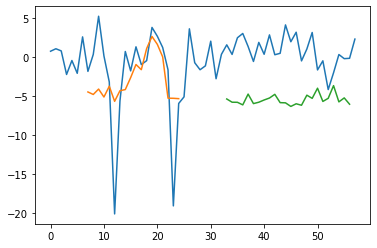

1/1 [==============================] - 0s 41ms/step
train score = [[ 0.        ]
 [60.24285417]
 [26.48403739]
 [11.99660031]
 [ 7.13870444]
 [ 6.85273778]
 [ 4.87478917]
 [ 4.41020308]
 [ 4.66704782]
 [ 3.68796993]
 [ 3.1314555 ]
 [ 4.01910716]
 [ 4.74445447]
 [ 4.15786546]
 [ 3.79065492]
 [ 3.60909679]
 [ 3.36474381]
 [ 2.98196341]]
test score = [[ 0.        ]
 [ 6.87201609]
 [ 1.81669702]
 [ 1.35645631]
 [ 3.49763253]
 [ 4.81707623]
 [ 3.38506963]
 [ 2.50301765]
 [ 3.19251656]
 [ 3.08506957]
 [ 2.89951352]
 [ 2.41068422]
 [ 2.77744507]
 [ 3.78745955]
 [ 4.88120883]
 [ 5.72761831]
 [ 8.17105781]
 [ 9.34361803]
 [10.51303506]
 [12.54481515]
 [13.62370809]
 [14.03619653]
 [13.28633178]
 [13.21359815]]


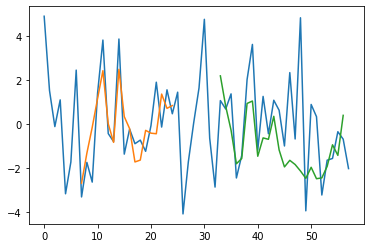

1/1 [==============================] - 0s 23ms/step
train score = [[ 0.        ]
 [31.2614411 ]
 [ 8.81898398]
 [ 3.92190599]
 [ 2.23207713]
 [ 2.1679349 ]
 [ 1.52228397]
 [ 1.51979075]
 [ 1.29774115]
 [ 1.13383798]
 [ 0.9570312 ]
 [ 0.84027987]
 [ 0.74382979]
 [ 0.65321676]
 [ 0.57201291]
 [ 0.51711411]
 [ 0.46855639]
 [ 0.41924063]]
test score = [[0.00000000e+00]
 [4.50633850e-04]
 [7.69553630e-02]
 [7.48464305e-02]
 [8.45894014e-02]
 [2.09081493e+00]
 [7.33018761e+00]
 [1.38040605e+01]
 [1.06370126e+01]
 [8.59968699e+00]
 [7.26080397e+00]
 [6.60999487e+00]
 [5.99544156e+00]
 [5.24061320e+00]
 [4.57072766e+00]
 [5.93546067e+00]
 [5.51280214e+00]
 [5.06356476e+00]
 [4.54201364e+00]
 [4.07653351e+00]
 [3.68564820e+00]
 [3.34968143e+00]
 [3.06971973e+00]
 [3.08388434e+00]]


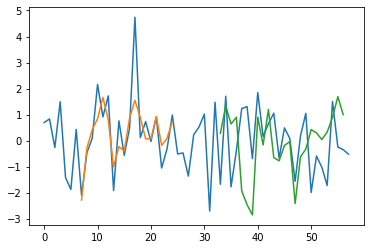

1/1 [==============================] - 0s 24ms/step
train score = [[0.        ]
 [0.48210898]
 [0.53332677]
 [0.40403443]
 [0.25586738]
 [0.19167192]
 [0.27915966]
 [0.30710804]
 [0.27224095]
 [0.23358275]
 [0.20890609]
 [0.22530336]
 [0.19990267]
 [0.22474876]
 [0.23519078]
 [0.23689469]
 [0.70053941]
 [0.68002648]]
test score = [[ 0.        ]
 [ 3.26650229]
 [ 3.21723931]
 [ 1.80680308]
 [ 2.8909749 ]
 [ 3.1840122 ]
 [12.83113147]
 [28.20667387]
 [27.65888033]
 [41.55729596]
 [42.15869751]
 [65.59276909]
 [69.72003965]
 [67.82100918]
 [61.39584104]
 [53.6572941 ]
 [47.70863326]
 [42.75547671]
 [39.76039622]
 [41.27084111]
 [37.53858527]
 [34.12139981]
 [31.17344108]
 [28.56746658]]


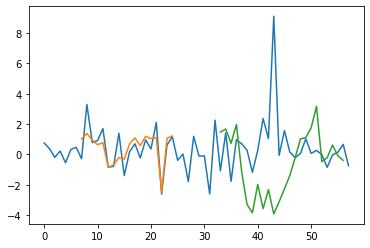

1/1 [==============================] - 0s 33ms/step
train score = [[0.        ]
 [0.00584179]
 [0.0202637 ]
 [0.02453673]
 [0.04315088]
 [0.04794645]
 [0.0537517 ]
 [0.06230333]
 [0.05233367]
 [0.05346383]
 [0.04369917]
 [0.03613944]
 [0.03116902]
 [0.03290786]
 [0.04156692]
 [0.04056345]
 [0.04622912]
 [0.04603521]]
test score = [[0.        ]
 [0.22380688]
 [0.41760494]
 [0.88705255]
 [1.56607897]
 [2.52393973]
 [4.57885701]
 [4.88301361]
 [4.74698199]
 [5.79771339]
 [6.91639487]
 [6.88265043]
 [5.80164862]
 [4.95789846]
 [4.29441817]
 [3.79252298]
 [3.38960641]
 [3.03608584]
 [2.73227205]
 [2.48719008]
 [2.26045002]
 [2.09523175]
 [2.01478195]
 [1.92779635]]


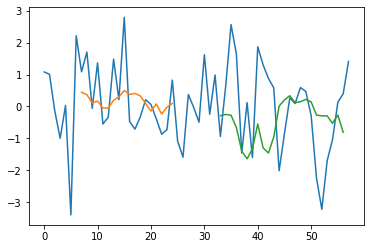

1/1 [==============================] - 0s 25ms/step
train score = [[  0.        ]
 [356.62440347]
 [105.16963366]
 [ 59.27857728]
 [ 36.57318263]
 [ 23.52758994]
 [ 22.367346  ]
 [ 26.92283202]
 [ 22.35062258]
 [ 18.94304927]
 [ 15.34912125]
 [ 12.88596269]
 [ 11.30625424]
 [  9.79337294]
 [  8.6844063 ]
 [  7.73907789]
 [  6.8975641 ]
 [  6.14600075]]
test score = [[0.00000000e+00]
 [6.94852421e-04]
 [1.87809005e-04]
 [4.53176543e-04]
 [5.05944009e-04]
 [1.12624663e-02]
 [4.59028413e-02]
 [7.45479813e-02]
 [5.71460528e-02]
 [4.94332434e-02]
 [1.54539351e-01]
 [1.46467411e-01]
 [1.47847455e-01]
 [1.25978249e-01]
 [1.08624288e-01]
 [1.89674330e-01]
 [1.75403415e-01]
 [1.79043347e-01]
 [1.80325396e-01]
 [1.72320609e-01]
 [1.57634976e-01]
 [1.42984515e-01]
 [1.73032734e-01]
 [3.05857332e-01]]


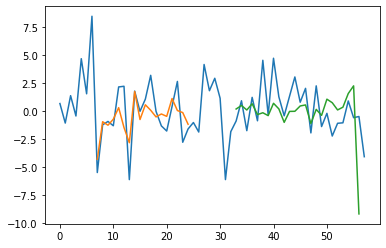

1/1 [==============================] - 0s 25ms/step
train score = [[ 0.        ]
 [73.71267961]
 [19.68618818]
 [ 9.01417593]
 [ 5.23238695]
 [ 3.69333831]
 [ 2.67685094]
 [ 2.07526662]
 [ 1.5913206 ]
 [ 1.27098432]
 [ 1.21368378]
 [ 1.14236472]
 [ 1.1139796 ]
 [ 0.95532739]
 [ 0.85726112]
 [ 0.74954981]
 [ 0.85416102]
 [ 1.04653665]]
test score = [[  0.        ]
 [547.28199352]
 [407.2096098 ]
 [197.1728143 ]
 [114.37064399]
 [194.70847058]
 [244.34862889]
 [183.42139784]
 [143.30553538]
 [128.67484393]
 [104.71906735]
 [ 89.73807232]
 [ 76.23662924]
 [ 65.10376203]
 [ 56.55605074]
 [ 50.38625204]
 [ 58.97802408]
 [ 54.73327097]
 [ 48.94180912]
 [ 44.06323252]
 [ 47.98496568]
 [ 75.17535951]
 [ 83.2804145 ]
 [ 79.41464703]]


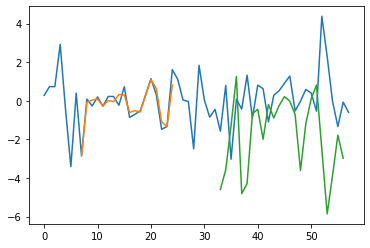

1/1 [==============================] - 0s 26ms/step
train score = [[   0.        ]
 [2654.27329911]
 [ 687.04045618]
 [ 328.97195748]
 [ 185.14340553]
 [ 133.90367716]
 [ 184.00622479]
 [ 165.17356998]
 [ 128.81688838]
 [ 103.50927955]
 [ 101.02012101]
 [  90.31582684]
 [  75.91017837]
 [  65.65971288]
 [  57.86532859]
 [  52.16412769]
 [  50.25628163]
 [  87.12789888]]
test score = [[   0.        ]
 [ 718.3939254 ]
 [ 310.28602884]
 [1404.2934586 ]
 [4534.42363645]
 [9204.98000979]
 [9213.61408091]
 [6831.64088637]
 [5244.38139779]
 [4149.20685801]
 [3637.62523502]
 [3276.96717131]
 [2987.66361845]
 [3485.32249641]
 [4085.74556858]
 [4909.39572322]
 [4755.97590424]
 [4213.82073556]
 [3763.54584603]
 [3385.12184838]
 [3374.19057518]
 [3114.96900599]
 [2841.68000196]
 [2606.76964386]]


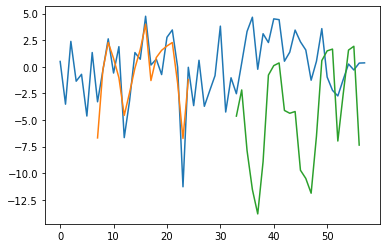

1/1 [==============================] - 0s 25ms/step
train score = [[0.        ]
 [0.0082525 ]
 [0.00281417]
 [0.01699484]
 [0.52074194]
 [0.43277486]
 [0.42197827]
 [0.36069993]
 [0.27992094]
 [0.2383861 ]
 [0.25718058]
 [0.21286797]
 [0.17974193]
 [0.15342809]
 [0.13647088]
 [0.36489926]
 [0.3220913 ]
 [0.30575751]]
test score = [[  0.        ]
 [ 36.03629089]
 [ 49.35454364]
 [ 65.6120065 ]
 [ 43.91484542]
 [ 47.21987631]
 [ 36.35840289]
 [ 28.28358852]
 [ 23.56218426]
 [ 18.70069195]
 [ 15.76770336]
 [ 41.46840128]
 [ 69.41834462]
 [ 82.81393958]
 [ 85.31091587]
 [ 86.46347616]
 [ 94.72513931]
 [180.32512849]
 [298.53791382]
 [268.48644944]
 [244.30994862]
 [221.84189745]
 [204.88322158]]


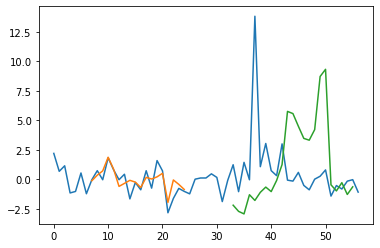

1/1 [==============================] - 0s 25ms/step
train score = [[0.00000000e+00]
 [8.30087052e-05]
 [6.52703378e-05]
 [3.07927301e-05]
 [1.97030190e-03]
 [2.27904983e-02]
 [9.97693528e-02]
 [7.63480463e-02]
 [1.70104895e-01]
 [1.78109605e-01]
 [1.44506762e-01]
 [4.21694651e+00]
 [5.79559997e+00]
 [5.87493422e+00]
 [8.73986062e+00]
 [7.98103334e+00]
 [8.33981275e+00]
 [9.41768178e+00]]
test score = [[ 0.        ]
 [ 0.21509157]
 [ 0.12084726]
 [ 0.06226237]
 [ 0.55234268]
 [ 0.40066994]
 [ 0.28352616]
 [ 0.20982403]
 [ 0.91321647]
 [ 0.74372213]
 [ 0.75401922]
 [ 0.65287239]
 [ 0.54927322]
 [ 3.22544917]
 [ 8.16506532]
 [ 7.11823979]
 [ 7.53075348]
 [ 7.1887979 ]
 [16.6859859 ]
 [28.64386023]
 [40.69844585]
 [38.30315219]]


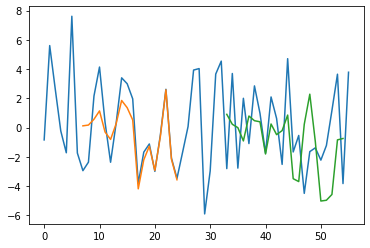

1/1 [==============================] - 0s 36ms/step
train score = [[0.        ]
 [3.8973058 ]
 [1.2556468 ]
 [0.55923387]
 [0.31480217]
 [0.21121106]
 [0.27814149]
 [0.22097909]
 [0.27484334]
 [0.61112342]
 [1.36355556]
 [1.78668436]
 [1.84100264]
 [1.68685007]
 [1.60926213]
 [1.54825735]
 [1.48033458]
 [1.43049868]]
test score = [[ 0.        ]
 [19.75218847]
 [19.77330131]
 [10.49026931]
 [ 8.73143792]
 [ 5.74759388]
 [ 4.76909774]
 [ 3.54103073]
 [ 2.722568  ]
 [ 2.39414253]
 [ 4.29879559]
 [11.8471155 ]
 [15.58276897]
 [15.92283269]
 [13.73295921]
 [11.9636946 ]
 [10.52174325]
 [ 9.35913118]
 [ 8.4050731 ]
 [ 8.78330465]]


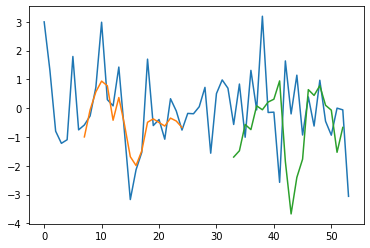

1/1 [==============================] - 0s 28ms/step
train score = [[0.        ]
 [7.36527685]
 [2.16540401]
 [1.07751966]
 [0.69612631]
 [0.59653605]
 [0.46421927]
 [0.48341989]
 [0.58832573]
 [3.75213857]
 [3.22240421]
 [2.68653733]
 [5.23505469]
 [4.46180359]
 [4.21223567]
 [3.95745305]
 [3.80311621]
 [3.76496188]]
test score = [[0.00000000e+00]
 [7.38173024e-05]
 [3.37443188e-02]
 [1.13976284e-01]
 [4.61547831e+01]
 [4.46855290e+01]
 [3.14266495e+01]
 [2.81267618e+01]
 [3.55117038e+01]
 [3.13055480e+01]
 [2.58827241e+01]
 [5.89129820e+01]
 [6.78819430e+01]
 [6.08616266e+01]
 [5.25825652e+01]
 [5.06247723e+01]
 [5.63703204e+01]
 [5.65735123e+01]
 [5.47423587e+01]
 [4.91394334e+01]
 [4.69189950e+01]
 [4.32078308e+01]
 [4.05897742e+01]]


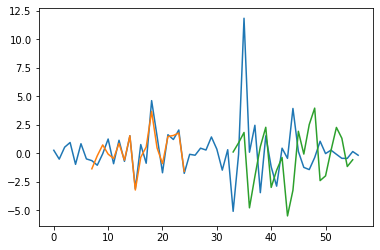

1/1 [==============================] - 0s 24ms/step
train score = [[0.        ]
 [2.20176174]
 [0.78059651]
 [3.5656669 ]
 [6.21240409]
 [4.34374975]
 [3.15673746]
 [3.28233879]
 [3.02066747]
 [2.7501454 ]
 [2.35066187]
 [2.03430171]
 [1.74078066]
 [1.48359092]
 [2.40797992]
 [2.1905127 ]
 [3.86327126]
 [3.4532829 ]]
test score = [[  0.        ]
 [400.27481137]
 [106.35629919]
 [ 84.98909067]
 [ 89.04049376]
 [ 76.84259798]
 [ 60.50957113]
 [ 45.39211737]
 [ 36.52968917]
 [ 32.90251057]
 [ 31.14549214]
 [ 31.49335668]
 [ 31.37696229]
 [ 30.9755718 ]
 [ 31.92700263]
 [ 34.54440598]
 [ 35.0273474 ]
 [ 34.48426821]
 [ 32.7067129 ]
 [ 31.0769542 ]
 [ 28.59283313]
 [ 26.05248262]
 [ 23.75196611]]


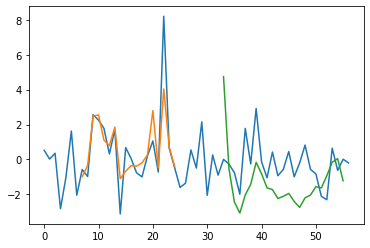

1/1 [==============================] - 0s 27ms/step
train score = [[0.00000000e+00]
 [5.26822690e-05]
 [2.57082787e-01]
 [1.06521111e+01]
 [6.19588077e+00]
 [4.54792396e+00]
 [3.20191585e+00]
 [2.71111695e+00]
 [2.38666916e+00]
 [2.13103446e+00]
 [1.81315477e+00]
 [1.50051791e+00]
 [1.28301133e+00]
 [1.17377710e+00]
 [1.20435996e+00]
 [1.22375320e+00]
 [1.12137367e+00]
 [1.02267937e+00]]
test score = [[ 0.        ]
 [78.64119627]
 [26.71138605]
 [17.87428989]
 [18.300534  ]
 [12.46017225]
 [10.84797763]
 [ 9.34081425]
 [ 8.50924155]
 [ 8.02642352]
 [ 6.67665027]
 [ 5.53559302]
 [ 4.98819122]
 [ 4.98940732]
 [ 6.31939166]
 [ 7.13142703]
 [ 6.27367731]
 [ 5.74556204]
 [ 6.63411854]
 [ 6.7586151 ]
 [ 7.55564429]
 [ 8.03931306]
 [ 7.41811464]]


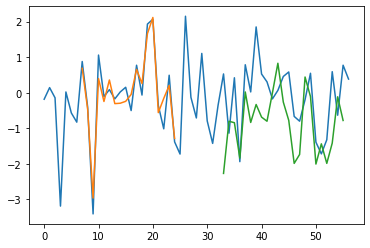

1/1 [==============================] - 0s 24ms/step
train score = [[ 0.        ]
 [19.86082874]
 [23.01933384]
 [15.26767931]
 [ 8.64011345]
 [ 6.40189757]
 [ 5.44316896]
 [ 4.0284429 ]
 [ 3.65839916]
 [ 3.71332611]
 [ 3.62560194]
 [ 3.41558161]
 [ 3.39992151]
 [ 3.08597546]
 [ 3.50695668]
 [ 4.0980699 ]
 [ 3.60292112]
 [ 3.19307005]]
test score = [[  0.        ]
 [ 40.03949444]
 [119.89668282]
 [ 58.45819074]
 [ 32.94962268]
 [ 25.66882304]
 [ 18.45047153]
 [ 42.19705872]
 [ 46.98135816]
 [ 37.20019753]
 [ 30.26612707]
 [ 26.03270128]
 [ 24.05895414]
 [ 32.26005768]
 [ 28.02964325]
 [ 26.13224856]
 [ 25.43484752]
 [ 25.49137658]
 [ 23.17491818]
 [ 21.37150362]
 [ 19.40014701]
 [ 17.72976603]]


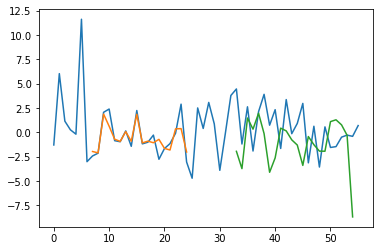

1/1 [==============================] - 0s 23ms/step
train score = [[0.00000000e+00]
 [3.77773185e-07]
 [7.87145259e-02]
 [2.45097448e-01]
 [2.21298258e-01]
 [2.24857276e-01]
 [1.80168679e-01]
 [1.72270703e-01]
 [1.49148781e-01]
 [2.62791176e-01]
 [2.25640310e-01]
 [1.86988729e-01]
 [1.57317767e-01]
 [1.88570433e-01]
 [4.17622863e-01]
 [3.80748987e-01]
 [3.67624098e-01]
 [4.01066718e-01]]
test score = [[0.        ]
 [3.81286022]
 [1.08970325]
 [0.54229431]
 [0.36370156]
 [0.68974009]
 [3.10467223]
 [3.18567049]
 [3.12909915]
 [2.5020982 ]
 [3.07516432]
 [4.52307857]
 [3.87564867]
 [3.31497202]
 [2.85913904]
 [2.54176   ]
 [2.26652639]
 [2.50004494]
 [2.92557641]
 [3.01019065]
 [2.7574629 ]
 [3.43868449]]


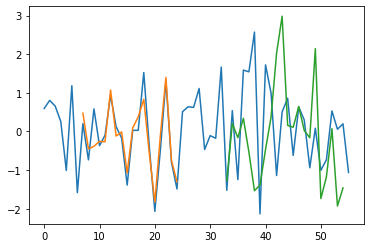

1/1 [==============================] - 0s 30ms/step
train score = [[0.        ]
 [0.00738257]
 [0.02860278]
 [0.03432945]
 [0.02906278]
 [0.01991067]
 [0.01554995]
 [0.01305549]
 [0.01349001]
 [0.48327996]
 [0.62794142]
 [0.58128963]
 [0.56178683]
 [0.50530483]
 [0.44096711]
 [0.42653519]
 [0.40972066]
 [0.40548118]]
test score = [[0.00000000e+00]
 [1.28966201e-02]
 [5.89532794e-03]
 [2.62934321e-03]
 [1.47900560e-03]
 [2.05376529e-03]
 [2.24190737e-03]
 [1.98297104e-03]
 [3.61442415e-03]
 [3.18723407e-03]
 [6.45946207e-02]
 [1.04616637e-01]
 [1.26353895e+00]
 [4.24444097e+00]
 [3.67159168e+00]
 [3.19857036e+00]
 [2.82307257e+00]
 [2.59425334e+00]
 [2.48315075e+00]
 [2.28249008e+00]
 [2.06096004e+00]
 [1.87885632e+00]
 [1.71463978e+00]]


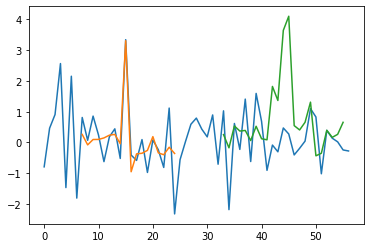

1/1 [==============================] - 0s 30ms/step
train score = [[0.        ]
 [0.66315622]
 [0.19519044]
 [0.13941871]
 [0.08343672]
 [0.06189876]
 [0.08290559]
 [0.49540902]
 [1.34259581]
 [1.07130153]
 [0.93207806]
 [0.80606397]
 [0.71435401]
 [0.83043213]
 [0.71703932]
 [0.6309538 ]
 [1.21869316]
 [1.17817561]]
test score = [[0.00000000e+00]
 [2.71262588e-08]
 [3.13866804e-05]
 [5.30527526e-05]
 [2.49241892e-03]
 [4.79847284e-03]
 [4.74529768e-03]
 [8.71196275e-03]
 [2.09378520e-02]
 [2.97824928e-02]
 [3.56952642e-02]
 [3.26142755e-02]
 [3.08229133e-02]
 [3.19395464e-02]]


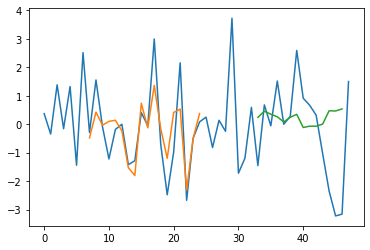

1/1 [==============================] - 0s 35ms/step
train score = [[0.        ]
 [0.0051439 ]
 [0.00133774]
 [0.0006577 ]
 [0.00119133]
 [0.0145473 ]
 [0.1673345 ]
 [0.25177218]
 [0.33053822]
 [0.27934052]
 [0.24242228]
 [0.22115213]
 [0.19837433]
 [0.17019425]
 [0.15208579]
 [0.13703699]
 [0.1210288 ]
 [0.11537004]]
test score = [[0.        ]
 [0.15858164]
 [0.05860178]
 [0.17303667]
 [0.10091167]
 [0.0645849 ]
 [0.04507518]
 [0.03404209]
 [0.02661039]
 [0.02561601]
 [0.02194825]
 [0.02744968]
 [0.04411112]
 [0.03787815]
 [0.03654131]
 [0.04546751]
 [0.0921193 ]
 [0.08400844]
 [0.09054528]
 [0.08216785]
 [0.08519897]
 [0.07730962]
 [0.15860692]]


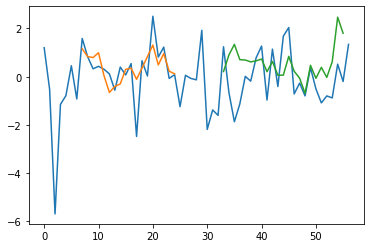

1/1 [==============================] - 0s 23ms/step
train score = [[0.        ]
 [1.79001717]
 [1.21719502]
 [0.96323301]
 [0.54494066]
 [0.4685724 ]
 [0.4561851 ]
 [0.44166698]
 [0.43160863]
 [0.34666468]
 [0.2857825 ]
 [0.24561454]
 [0.21028799]
 [0.18000294]
 [0.16583324]
 [0.27573559]
 [0.27802536]
 [0.50036513]]
test score = [[ 0.        ]
 [29.46342142]
 [ 8.67234498]
 [ 9.62616297]
 [ 5.56005188]
 [ 3.65836847]
 [ 2.55401521]
 [ 1.90701443]
 [ 1.460718  ]
 [ 1.22856006]
 [ 1.02336163]
 [ 0.85883729]
 [ 0.7307275 ]
 [ 0.63251734]
 [ 0.64251995]
 [ 0.56558524]
 [ 0.50053279]
 [ 0.4483247 ]
 [ 0.40013439]
 [ 0.37016684]
 [ 0.33487192]
 [ 0.32857269]
 [ 0.52982803]]


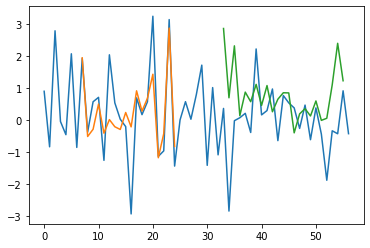

1/1 [==============================] - 0s 24ms/step
train score = [[ 0.        ]
 [ 0.20773934]
 [ 0.07692631]
 [ 0.08720387]
 [ 0.04911531]
 [ 0.18117163]
 [ 0.26237962]
 [ 0.25208523]
 [ 0.28967941]
 [ 0.24677015]
 [ 0.38898107]
 [ 0.47432721]
 [ 0.4050496 ]
 [ 0.36774394]
 [ 0.33892407]
 [ 1.93220388]
 [34.02073202]
 [34.90268886]]
test score = [[   0.        ]
 [3246.97183819]
 [ 861.89851536]
 [ 384.32544562]
 [ 254.68041105]
 [ 485.25268761]
 [ 373.47602605]
 [ 277.82153996]
 [ 213.21276256]
 [ 181.7924189 ]
 [ 151.90200054]
 [ 127.92701499]
 [ 108.06366689]
 [  92.25723238]
 [ 124.68884787]
 [ 133.270541  ]
 [ 151.53655207]
 [ 167.83023699]
 [ 162.63488113]
 [ 146.38286896]
 [ 162.31502399]
 [ 281.70889945]
 [ 304.19018369]]


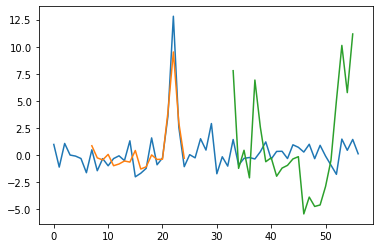

1/1 [==============================] - 0s 23ms/step
train score = [[0.        ]
 [1.6183999 ]
 [0.40547779]
 [0.18690348]
 [0.3082466 ]
 [1.94558457]
 [5.53254033]
 [6.72784059]
 [5.77365835]
 [5.53289197]
 [6.85173507]
 [9.28680414]
 [7.80350834]
 [6.67087584]
 [5.80578015]
 [7.01068377]
 [6.2544737 ]
 [5.59256466]]
test score = [[  0.        ]
 [ 13.35989983]
 [  4.78918416]
 [ 28.66926955]
 [212.3522884 ]
 [410.06649874]
 [479.00501445]
 [352.54767229]
 [272.08998577]
 [219.98523569]
 [179.92213154]
 [149.35077037]
 [125.49954667]
 [115.12816252]
 [115.4923572 ]
 [120.56981645]
 [109.13860401]
 [ 97.79670005]
 [ 87.23226178]
 [ 79.4236638 ]
 [ 72.35859752]
 [ 66.31595722]
 [ 61.19335928]]


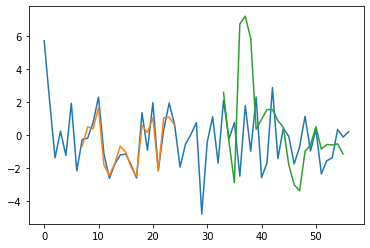

1/1 [==============================] - 0s 30ms/step
train score = [[0.00000000e+00]
 [2.68560580e-03]
 [1.03158334e-03]
 [1.45283047e-03]
 [5.53921054e-02]
 [4.75991966e-01]
 [1.10355572e+00]
 [8.16721557e-01]
 [6.49745028e-01]
 [5.98452728e-01]
 [4.91524854e-01]
 [4.66338036e-01]
 [3.92556628e-01]
 [7.11291754e-01]
 [7.14432657e-01]
 [1.16914377e+00]
 [1.13569591e+00]
 [1.00652908e+00]]
test score = [[ 0.        ]
 [ 0.04398704]
 [ 0.01493705]
 [ 0.03226109]
 [ 1.7301768 ]
 [ 3.00418195]
 [ 4.28629394]
 [ 6.76524484]
 [12.07509523]
 [10.96459469]
 [ 8.90786966]
 [ 7.51283996]
 [ 6.31334497]
 [ 5.42512401]
 [ 5.23006121]
 [ 4.59855559]
 [ 4.3270626 ]
 [ 3.83683706]
 [ 4.7553544 ]
 [ 4.26855791]
 [ 4.71287211]
 [ 5.66320845]
 [ 7.65796598]]


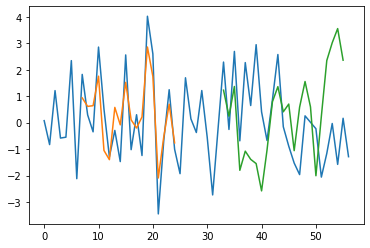

1/1 [==============================] - 0s 26ms/step
train score = [[0.        ]
 [0.10553539]
 [0.50815437]
 [0.27277439]
 [0.21157968]
 [0.16016353]
 [0.24006564]
 [0.22722245]
 [0.17631155]
 [0.17152703]
 [0.41827762]
 [0.49315745]
 [0.41458313]
 [0.35376287]
 [0.32176345]
 [1.02838659]
 [0.99909531]
 [0.88509226]]
test score = [[ 0.        ]
 [ 3.47221902]
 [ 0.89543686]
 [ 0.39798645]
 [ 6.24216456]
 [ 6.40874098]
 [ 4.56437219]
 [ 4.19197709]
 [ 7.81326282]
 [12.05442949]
 [13.06698881]
 [11.51757079]
 [ 9.84887691]
 [ 8.40508945]
 [ 8.46338247]
 [ 7.98671932]
 [ 7.04996542]
 [ 6.24523239]
 [ 5.68540389]
 [ 5.54254324]
 [ 5.08527452]
 [ 5.01950273]
 [ 4.64372561]]


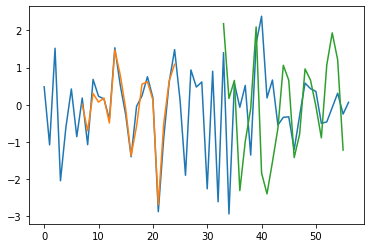

1/1 [==============================] - 0s 29ms/step
train score = [[0.        ]
 [0.0160966 ]
 [0.0120018 ]
 [0.00764238]
 [0.02123931]
 [0.06493489]
 [0.04773376]
 [0.04699186]
 [0.03672005]
 [0.02940491]
 [0.22360519]
 [0.20390486]
 [0.17522159]
 [0.16107516]
 [0.15561045]
 [0.18089432]
 [0.2265512 ]
 [0.20073106]]
test score = [[0.        ]
 [0.80003883]
 [3.43965818]
 [1.78369842]
 [5.57047042]
 [4.0390043 ]
 [3.01592118]
 [2.66870484]
 [4.61275348]
 [6.84841825]
 [7.49182021]
 [6.73041033]
 [5.71337139]
 [4.8736061 ]
 [4.86318384]
 [4.54521691]
 [4.31778146]
 [3.93414919]
 [3.64803391]
 [3.33766285]
 [3.01872066]
 [2.74048837]
 [2.50269233]]


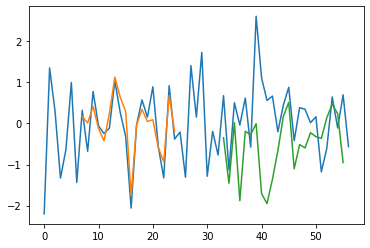

1/1 [==============================] - 0s 24ms/step
train score = [[0.00000000e+00]
 [6.81030870e-05]
 [2.60848802e-03]
 [4.97222266e-01]
 [4.88761722e+00]
 [3.14065064e+00]
 [2.25560770e+00]
 [1.73146646e+00]
 [1.33532811e+00]
 [1.05678646e+00]
 [9.60729652e-01]
 [8.20210525e-01]
 [7.89181837e-01]
 [4.54392461e+00]
 [4.74488672e+00]
 [4.64150239e+00]
 [4.51599091e+00]
 [4.33914967e+00]]
test score = [[  0.        ]
 [  6.18668684]
 [ 20.02293273]
 [ 35.8840339 ]
 [ 36.98950803]
 [ 79.62579381]
 [139.89360562]
 [128.26072246]
 [100.1663061 ]
 [ 81.0715595 ]
 [130.52490608]
 [143.26826372]
 [129.3866452 ]
 [164.62636288]
 [162.86516146]
 [154.47721319]
 [138.74881115]
 [126.93507394]
 [117.36560772]
 [107.78092281]
 [102.84823831]
 [100.58470523]]


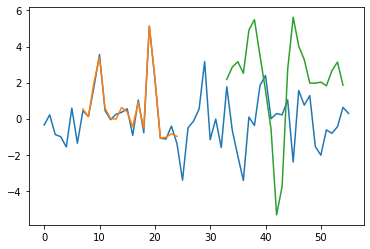

1/1 [==============================] - 0s 32ms/step
train score = [[ 0.        ]
 [31.09212844]
 [23.77834762]
 [15.38732997]
 [10.22870437]
 [ 6.6687601 ]
 [ 4.67762152]
 [ 4.38792078]
 [ 6.22514878]
 [ 7.33094464]
 [ 6.52514477]
 [ 7.43119502]
 [ 6.32816862]
 [ 6.10146316]
 [ 7.25489925]
 [ 6.33174157]
 [ 7.37203622]
 [ 6.5397638 ]]
test score = [[0.00000000e+00]
 [3.67326173e-02]
 [2.17723335e+02]
 [1.12351733e+02]
 [8.30855570e+01]
 [1.07275013e+02]
 [1.45247239e+02]
 [2.28457563e+02]
 [2.16702546e+02]
 [1.72109135e+02]
 [1.66521898e+02]
 [1.44356702e+02]
 [1.30958795e+02]
 [1.56649512e+02]
 [1.82310941e+02]
 [1.79690881e+02]
 [1.71693449e+02]
 [1.55772196e+02]
 [1.46032294e+02]
 [1.65113125e+02]
 [1.85039299e+02]
 [2.16325836e+02]
 [2.47892779e+02]]


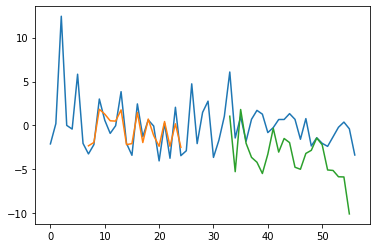

1/1 [==============================] - 0s 25ms/step
train score = [[0.        ]
 [0.24923017]
 [0.2939696 ]
 [0.2153463 ]
 [0.15889821]
 [0.16824227]
 [0.11751542]
 [0.09328679]
 [0.0730397 ]
 [0.06812102]
 [0.23586906]
 [0.21623021]
 [0.22035962]
 [0.18939347]
 [0.17246745]
 [0.23762752]
 [0.2157856 ]
 [0.2156012 ]]
test score = [[  0.        ]
 [390.23147962]
 [133.41323742]
 [ 71.16284836]
 [ 45.74965017]
 [ 29.34051066]
 [ 20.89059447]
 [ 16.57011641]
 [ 29.71300818]
 [ 36.8644106 ]
 [ 29.88901315]
 [ 25.08399177]
 [ 21.74648686]
 [ 19.67052973]
 [ 22.71791173]
 [ 20.95124828]
 [ 18.85981948]
 [ 20.7995412 ]
 [ 20.50560575]
 [ 18.59243927]
 [ 19.44658524]
 [ 19.16629631]
 [ 17.4682723 ]]


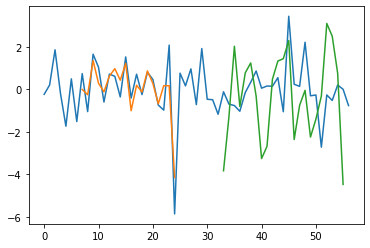

1/1 [==============================] - 0s 27ms/step
train score = [[ 0.        ]
 [18.73755181]
 [15.60524037]
 [ 8.29475166]
 [ 4.7038156 ]
 [ 6.86331682]
 [ 7.23424578]
 [ 5.40044334]
 [ 4.29306645]
 [ 3.76725116]
 [ 4.18183967]
 [ 4.70518232]
 [ 4.01653051]
 [ 3.4249299 ]
 [ 3.24360294]
 [ 4.94421856]
 [ 8.55980591]
 [ 8.07036497]]
test score = [[ 0.        ]
 [ 0.25404826]
 [77.47830917]
 [52.2339526 ]
 [65.8521813 ]
 [66.52461922]
 [77.81901503]
 [80.3040864 ]
 [67.95339283]
 [78.5869198 ]
 [78.79512747]
 [73.55219507]
 [67.64695678]
 [58.79906577]
 [52.30744342]
 [47.58081797]
 [44.90317672]
 [41.36139688]
 [40.39914896]
 [41.17108393]
 [40.64390036]
 [42.61004934]
 [61.19160667]]


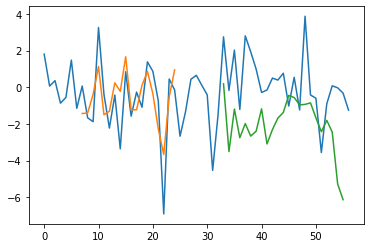

1/1 [==============================] - 0s 26ms/step
train score = [[0.00000000e+00]
 [3.96871529e-04]
 [6.88165186e-04]
 [4.02911291e-02]
 [6.11173266e-02]
 [1.17304092e-01]
 [1.29990008e-01]
 [1.71079926e-01]
 [2.29029406e-01]
 [1.93284386e-01]
 [1.97100056e-01]
 [1.91125982e-01]
 [3.26363884e-01]
 [5.65828066e-01]
 [6.72626173e-01]
 [6.55566400e-01]
 [8.62176307e-01]
 [7.80743685e-01]]
test score = [[0.        ]
 [0.4606091 ]
 [0.15714912]
 [0.09088574]
 [0.09749649]
 [0.30949173]
 [1.07827441]
 [0.86800359]
 [0.70785575]
 [1.43822509]
 [2.30160239]
 [2.4566873 ]
 [2.59681067]
 [2.25412348]
 [2.23582385]
 [2.26380761]
 [2.27690058]
 [2.13063356]
 [2.94794832]
 [2.64585802]
 [2.96095954]
 [2.6897011 ]
 [2.47180968]]


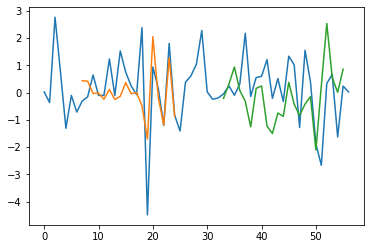

1/1 [==============================] - 0s 26ms/step
train score = [[0.00000000e+00]
 [1.31756303e-07]
 [5.79516954e-06]
 [2.77957273e-06]
 [9.48074448e-06]
 [1.93439818e-01]
 [1.87923419e-01]
 [1.44536998e-01]
 [1.13441293e-01]
 [1.24253314e-01]
 [1.20180178e-01]
 [1.67316980e-01]
 [1.42775745e-01]
 [1.22342569e-01]
 [1.18213207e-01]
 [2.48491258e-01]
 [3.71917889e-01]
 [3.29868022e-01]]
test score = [[0.        ]
 [0.0111402 ]
 [0.0031234 ]
 [0.40110524]
 [1.51630686]
 [1.4029085 ]
 [1.39819482]
 [1.18153773]
 [1.20830834]
 [1.80592286]
 [1.72567063]
 [1.60289376]
 [1.48826883]
 [1.27290189]
 [1.11009262]
 [1.02963931]
 [0.97322144]
 [0.87238561]
 [0.78688184]
 [0.73176847]
 [0.67595444]
 [0.66076742]
 [0.65828741]]


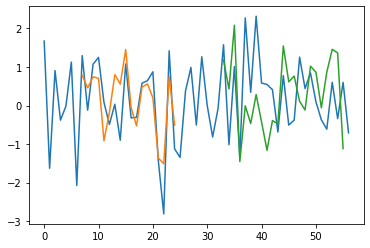

1/1 [==============================] - 0s 32ms/step
train score = [[0.        ]
 [2.35389146]
 [1.06137965]
 [0.49350185]
 [0.28530146]
 [0.43405177]
 [0.30766452]
 [0.23197744]
 [0.20237069]
 [0.23543114]
 [0.20538468]
 [0.16980012]
 [0.15516287]
 [0.13711258]
 [0.15414365]
 [0.20007024]
 [0.19356392]
 [0.21154959]]
test score = [[0.        ]
 [1.24186648]
 [0.5966614 ]
 [1.12289778]
 [1.82814882]
 [3.07980821]
 [4.33581928]
 [6.53807933]
 [6.53065548]
 [6.5911125 ]
 [7.03116331]
 [8.20261196]
 [7.68323639]
 [6.60447859]
 [6.21089279]
 [5.86094919]
 [6.28579321]
 [6.4412706 ]
 [6.30075782]
 [6.1703569 ]
 [6.21152981]]


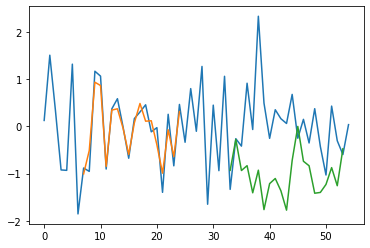

1/1 [==============================] - 0s 31ms/step
train score = [[0.00000000e+00]
 [1.67401051e-03]
 [6.94934825e-04]
 [5.48112826e-03]
 [1.94881413e-02]
 [1.54131370e-02]
 [1.46490316e-02]
 [2.60158665e-02]
 [2.01640470e-02]
 [3.75778943e-01]
 [3.66063512e+00]
 [3.15954279e+00]
 [5.05464361e+00]
 [5.37574360e+00]
 [6.54443708e+00]
 [5.74625533e+00]
 [5.05089440e+00]
 [4.94158208e+00]]
test score = [[ 0.        ]
 [ 4.34318308]
 [ 1.60260015]
 [ 6.38895426]
 [ 5.79647714]
 [ 7.93648344]
 [ 7.07636556]
 [20.06658087]
 [17.70232376]
 [14.49032502]
 [13.25200869]
 [10.98240222]
 [ 9.22851685]
 [ 7.90145909]
 [ 6.89276163]
 [ 6.15365182]
 [ 5.48967597]
 [ 5.53449898]
 [ 4.93760201]
 [ 4.43263615]]


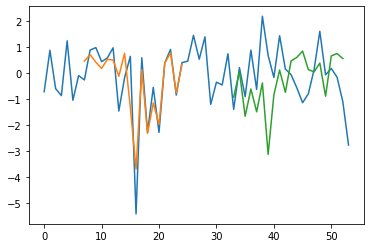

1/1 [==============================] - 0s 24ms/step
train score = [[0.00000000e+00]
 [1.03583728e-02]
 [2.95746696e-03]
 [7.68301154e-03]
 [4.40383910e-03]
 [3.08564042e-02]
 [1.74917415e-01]
 [1.30037410e-01]
 [2.17482331e-01]
 [8.53258588e+00]
 [7.08345869e+00]
 [8.98903911e+00]
 [7.95384800e+00]
 [9.67022125e+00]
 [8.34733516e+00]
 [7.30044654e+00]
 [6.66313443e+00]
 [5.95541414e+00]]
test score = [[  0.        ]
 [ 99.77037071]
 [148.75644488]
 [ 67.45922714]
 [ 39.61296729]
 [ 27.14091009]
 [ 19.27643624]
 [ 14.24458129]
 [ 11.21912242]
 [  9.01166003]
 [  7.55117814]
 [  6.97746588]
 [  6.45923291]
 [  5.73978849]
 [  5.05613576]
 [  4.62138798]
 [  4.06643244]
 [  3.82950303]
 [  3.41613212]]


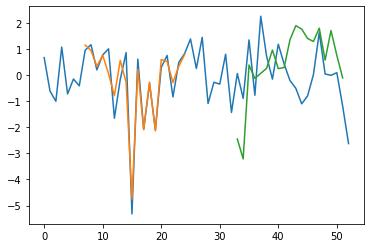

1/1 [==============================] - 0s 51ms/step
train score = [[0.        ]
 [0.00795215]
 [1.40632226]
 [2.56966412]
 [2.22364782]
 [2.16128048]
 [2.01067696]
 [1.69612715]
 [1.62630262]
 [1.4681372 ]
 [1.19208965]
 [2.02375766]
 [2.05246333]
 [2.07779048]
 [2.07704723]
 [2.43495035]
 [2.5551182 ]
 [2.27827368]]
test score = [[0.        ]
 [0.0632826 ]
 [0.59294336]
 [0.26446481]
 [0.18372978]
 [0.16177587]
 [0.4374335 ]
 [0.32232459]
 [0.27906219]
 [0.22238819]
 [0.18673068]
 [0.30541625]
 [0.57187999]
 [0.70589765]
 [0.6754162 ]
 [0.718239  ]
 [1.08772195]
 [1.07562773]
 [1.27103736]
 [1.22649464]
 [1.52089658]]


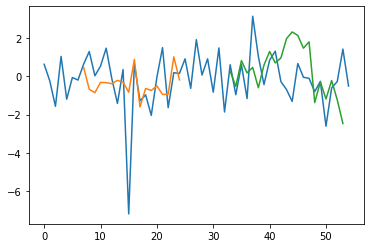

1/1 [==============================] - 0s 27ms/step
train score = [[ 0.        ]
 [25.34729941]
 [ 9.11432129]
 [ 4.61049332]
 [ 2.62739747]
 [ 1.70654371]
 [ 1.22138984]
 [ 1.33983642]
 [ 1.06473109]
 [ 0.85149585]
 [ 0.79886908]
 [ 0.6622653 ]
 [ 0.57560672]
 [ 8.09725611]
 [10.73344955]
 [10.76842469]
 [ 9.8177907 ]
 [ 9.77423288]]
test score = [[  0.        ]
 [  2.89582179]
 [  1.39399157]
 [ 11.20725638]
 [ 13.80269617]
 [  9.58779838]
 [ 17.98494843]
 [ 56.51260611]
 [ 86.41409952]
 [106.96405218]
 [137.69727994]
 [247.85734355]
 [340.3819356 ]
 [427.85832946]
 [489.32729048]
 [610.38119844]
 [784.55939546]
 [931.45510594]]


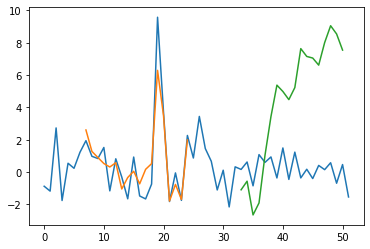

1/1 [==============================] - 0s 37ms/step
train score = [[ 0.        ]
 [95.44353482]
 [32.72224832]
 [21.89872353]
 [13.40585948]
 [16.2168035 ]
 [12.81315279]
 [11.87816111]
 [11.88245423]
 [10.93448804]
 [37.36791687]
 [31.12633363]
 [26.56741059]
 [57.73501939]
 [50.88793388]
 [49.65570452]
 [45.99557568]
 [41.97278528]]
test score = [[   0.        ]
 [1615.18544736]
 [2230.54090322]
 [1273.04035979]
 [ 860.82477272]
 [ 613.02107618]
 [ 438.0494645 ]
 [ 321.87764835]
 [ 246.50592509]
 [ 195.12805813]
 [ 158.17177774]
 [ 180.3620513 ]
 [ 153.09735828]
 [ 131.76067828]
 [ 136.96523786]
 [ 120.2393337 ]
 [ 113.68871466]
 [ 118.03263333]
 [ 131.55833493]
 [ 171.26215785]]


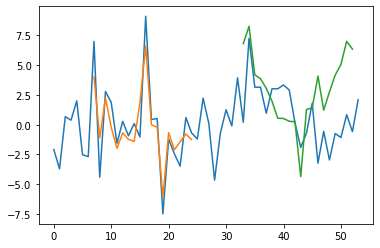

1/1 [==============================] - 0s 54ms/step
train score = [[ 0.        ]
 [ 0.16293444]
 [28.08057063]
 [67.53446141]
 [77.45001734]
 [58.93821629]
 [41.07916132]
 [60.86798988]
 [46.87639488]
 [45.54081326]
 [42.85279143]
 [43.32836969]
 [40.42000786]
 [34.56289107]
 [31.20630501]
 [29.96297214]
 [29.07224789]
 [28.32406709]]
test score = [[ 0.        ]
 [37.14022671]
 [12.49742203]
 [ 7.76493539]
 [ 5.95622196]
 [ 4.53529727]
 [ 4.92479869]
 [ 8.1310496 ]
 [11.78457748]
 [18.71884607]
 [16.06146111]
 [14.66853657]
 [15.00106059]
 [15.09850357]
 [13.02043264]
 [11.78606851]
 [12.7735626 ]
 [12.42123075]]


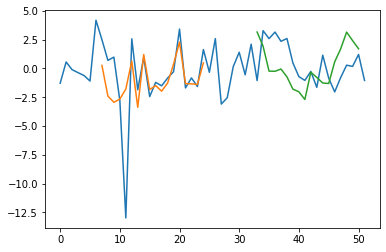

1/1 [==============================] - 0s 30ms/step
train score = [[ 0.        ]
 [ 6.18481036]
 [12.08431341]
 [17.56551175]
 [23.08824938]
 [16.39342541]
 [12.18030428]
 [ 8.9530942 ]
 [ 8.73129514]
 [12.84177898]
 [31.78674405]
 [37.51396967]
 [35.5728651 ]
 [30.87697348]
 [26.93315931]
 [25.42030436]
 [23.15513388]
 [21.05641941]]
test score = [[ 0.        ]
 [12.58196586]
 [ 4.58680146]
 [ 4.08118701]
 [ 2.44206395]
 [76.8423813 ]
 [85.1301544 ]
 [73.9299225 ]
 [59.44601958]
 [50.84792643]
 [42.41796122]
 [44.28356957]
 [49.0082781 ]
 [50.51192424]
 [45.2619522 ]]


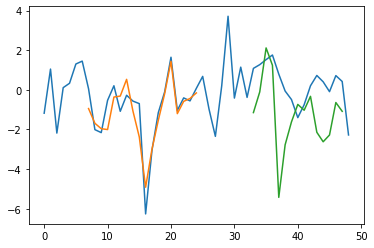

1/1 [==============================] - 0s 36ms/step
train score = [[0.00000000e+00]
 [6.34606413e-04]
 [2.41818968e-02]
 [1.23235939e-01]
 [1.56776297e-01]
 [1.27745839e-01]
 [1.86286315e-01]
 [2.33072051e-01]
 [1.78547936e-01]
 [2.34152476e-01]
 [6.60841631e-01]
 [1.86850007e+00]
 [1.81263750e+00]
 [1.63540465e+00]
 [1.65061606e+00]
 [1.44599311e+00]
 [1.35688046e+00]
 [1.21417854e+00]]
test score = [[ 0.        ]
 [ 0.24580487]
 [ 0.37121324]
 [51.77709857]
 [65.95825207]
 [62.22301424]
 [45.20428571]
 [35.36760019]
 [28.81788511]
 [25.31518917]
 [23.5163433 ]
 [22.17385383]
 [21.7616738 ]
 [20.03750109]
 [18.34733988]]


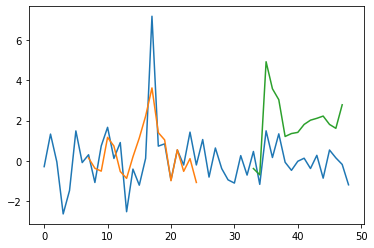

1/1 [==============================] - 0s 31ms/step
train score = [[0.        ]
 [0.08696147]
 [0.15354917]
 [3.68857455]
 [3.77907196]
 [3.36688544]
 [3.87929524]
 [2.88170269]
 [2.7981627 ]
 [2.24254373]
 [2.7078643 ]
 [3.36832602]
 [3.63703569]
 [4.1686042 ]
 [4.18352086]
 [4.52139485]
 [4.53766234]
 [5.05026271]]
test score = [[0.00000000e+00]
 [7.02388323e-02]
 [1.08376370e-01]
 [2.26354489e+01]
 [4.24925724e+01]
 [7.09103388e+01]
 [5.69781703e+01]
 [4.20832718e+01]
 [3.47253442e+01]
 [2.74376172e+01]
 [2.22278834e+01]
 [1.85994324e+01]
 [1.56399926e+01]
 [1.57967671e+01]
 [1.37354977e+01]
 [1.29366915e+01]]


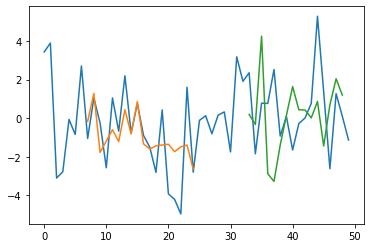

In [ ]:
# prepare datasets for training the LSTM model
def create_dataset(dataset, look_back=1):
    data_X, data_y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        data_X.append(a)
        data_y.append([dataset[i + look_back, 0]])
    return np.array(data_X), np.array(data_y)

# invert prediction (denormalize)
def invert_predictions(predictions, scaler, prediction_index=0):
    max_val = scaler.data_max_[prediction_index]
    min_val = scaler.data_min_[prediction_index]
    original_values = (predictions * (max_val - min_val)) + min_val
    
    return original_values

# compute the moving average rse to use as risk (shifted back by one so that 
# Sssthe risk is considered from the predicitons already made, not all of them)
def rmse_moving_average(y_true, y_pred):
    se = (y_pred - y_true) ** 2
    n = len(se)
    ma_se = np.zeros((n, 1))
    for i in range(n - 1):
        ma_se[i + 1, 0] = np.mean(se[:i + 1])
    
    rmase = np.square(ma_se)
    return rmase


# set random seed for reproducibility
tf.random.set_seed(7)

unique_companies = stocks['Ticker'].unique()

# set hyperparameters of the model
look_back = 7
n_features = 5

# define model
model = Sequential()
model.add(LSTM(8, input_shape=(look_back, n_features)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

for company in unique_companies:
    try:
        # get all of the features we want to train the model on
        dataset = stocks[stocks['Ticker'] == company][['Percent_Change', 'Sentiment_Weighted', 'Sentiment_MA', 'Tweets', 'Tweets_MA']]

        # normalize the dataset
        scaler = MinMaxScaler(feature_range=(0, 1))
        dataset = pd.DataFrame(scaler.fit_transform(dataset))

        # split into train and test sets according to date
        dataset['Date'] = stocks['Date']
        train = dataset.loc[dataset['Date'] < datetime.datetime(year=2016, month=4, day=25)].reset_index(drop=True)
        test = dataset.loc[dataset['Date'] >= datetime.datetime(year=2016, month=4, day=25)].reset_index(drop=True)
        train.drop(['Date'], axis=1, inplace=True)
        test.drop(['Date'], axis=1, inplace=True)
        train, test = train.values, test.values
        dataset.drop(['Date'], axis=1, inplace=True)

        # prepare sets for training
        train_X, train_y = create_dataset(train, look_back)
        test_X, test_y = create_dataset(test, look_back)

        # reshape for LSTM implementation
        train_X = np.reshape(train_X, (train_X.shape[0], look_back, n_features))
        test_X = np.reshape(test_X, (test_X.shape[0], look_back, n_features))

        # fit the LSTM network
        model.fit(train_X, train_y, epochs=70, batch_size=1, verbose=0)

        # make predictions
        train_predict = model.predict(train_X)
        test_predict = model.predict(test_X)
        test_predict = invert_predictions(test_predict, scaler)
        train_predict = invert_predictions(train_predict, scaler)
        
        # evaluate predictions
        train_scores = rmse_moving_average(train_y[:, 0], train_predict[:, 0])
        test_scores = rmse_moving_average(test_y[:, 0], test_predict[:, 0])
        print(f'train score = {train_scores[-1]}')
        print(f'test score = {test_scores[-1]}')

        # shift train and test predictions for plotting
        train_predict_plot = np.empty((dataset.shape[0], 1))
        train_predict_plot[:] = np.nan
        train_predict_plot[look_back : len(train_predict) + look_back] = train_predict

        test_predict_plot = np.empty((dataset.shape[0], 1))
        test_predict_plot[:] = np.nan
        test_predict_plot[len(train_predict) + (look_back * 2) + 1 : len(dataset) - 1] = test_predict

        # shift test scores as well
        testScoresPlot = np.empty((dataset.shape[0], 1))
        testScoresPlot[:] = np.nan
        testScoresPlot[len(train_predict) + (look_back * 2) + 1 : len(dataset) - 1] = test_scores

        # aggregate data in a dataframe
        stocks.loc[stocks.Ticker == company, "lstm_pred"] = test_predict_plot
        # use the test RMSE as the risk factor
        stocks.loc[stocks.Ticker == company, "risk"] = testScoresPlot

    except Exception as e:
        print(e)

    plt.plot(scaler.inverse_transform(dataset)[:, 0])
    plt.plot(train_predict_plot)
    plt.plot(test_predict_plot)
    plt.show()



<ipython-input-5-7ff3b90ef957>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_pos['invest ratio'] = temp_pos['lstm_pred'] / temp_pos['lstm_pred'].sum()


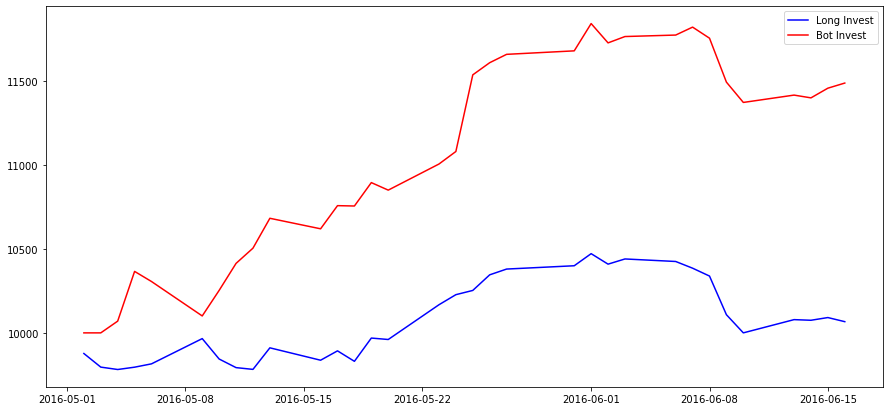

Long-Term Investment: 10066.86 ( 0.67 % )
Bot Trading: 11490.05 ( 14.9 % )


In [ ]:
test_data = stocks.loc[stocks['Date'] >= datetime.datetime(year=2016, month=4, day=30)].reset_index(drop=True)

dates = test_data['Date'].sort_values().unique()

bot_capital = 10000
long_capital = 10000

bots = [bot_capital]
longs = [long_capital]

for date in dates:
    # filter dataframe to date
    temp = stocks[stocks['Date'] == date]

    # Calculate profit from investing equal parts to all tickers in timeframe
    long_capital = long_capital + ((long_capital/len(temp)) * (temp['Percent_Change']/100)).sum()

    # Calculate profit from using our model to determine what stocks to invest in
    # We invest only when the risk of the model's prediction is low
    # We also invest the amount of money proportional to the expected Percent_Change
    temp_pos = temp[(temp['lstm_pred'] > 0) & (temp['risk'] < 0.8)]
    temp_pos['invest ratio'] = temp_pos['lstm_pred'] / temp_pos['lstm_pred'].sum()
    if len(temp) == 0:
        bot_capital = bot_capital
    else:
        bot_capital = bot_capital + ((bot_capital * temp_pos['invest ratio']) * (temp_pos['Percent_Change']/100)).sum()

    # Keep track of the account totals over time
    longs.append(long_capital)
    bots.append(bot_capital)


# Plot the accounts balances over time
plt.figure(figsize=(15,7))
plt.plot(dates, longs[1:], c='b', label='Long Invest')
plt.plot(dates, bots[1:], c='r', label='Bot Invest')
plt.legend()
plt.show()

# Show the return from each account over time
print('Long-Term Investment:', round(longs[-1], 2), '(', round((longs[-1] - longs[0]) / longs[0] * 100, 2), '% )')
print('Bot Trading:', round(bots[-1], 2), '(', round((bots[-1] - bots[0]) / bots[0] * 100, 2), '% )')